<a href="https://colab.research.google.com/github/marcv12/startup_success_prediction/blob/master/startup_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import minimize
import re



from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

from IPython.display import Image
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from pprint import pprint

In [ ]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/startup_data.csv", encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's start by getting an idea of what our updated dataframe looks like

In [ ]:
df

,status,category_groups_list,num_funding_rounds,total_funding_usd,num_seniors,male_senior_ratio,num_degrees,seed,early_investment,any_investment_funding,debt_or_other,investor_count,employee_count_cat,social_media_presence,continent,company_age,years_since_last_funding,years_of_funding_dependence
0,operating,Data and Analytics,1.0,724000.0,1,1.0,0.0,0,0,1,0,0.0,2,1,Europe,3.0,2.0,1.0
1,exited,Apps,2.0,3980787.0,2,1.0,0.0,0,0,1,0,2.0,2,1,Europe,10.0,7.0,3.0
2,operating,Consumer Electronics,1.0,0.0,3,1.0,0.0,1,0,0,0,1.0,1,1,Europe,8.0,7.0,1.0
3,exited,Advertising,5.0,5663703.0,6,1.0,1.0,1,0,1,0,3.0,3,1,Europe,10.0,5.0,5.0
4,operating,Data and Analytics,3.0,733836.0,3,1.0,0.0,1,0,1,0,7.0,2,1,Europe,10.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61855,operating,Financial Services,1.0,65380.0,2,1.0,0.0,0,1,0,0,1.0,1,0,Africa,2.0,2.0,0.0
61856,operating,Financial Services,2.0,505858.0,3,1.0,1.0,1,1,0,0,5.0,2,0,Africa,6.0,2.0,4.0
61857,operating,Artificial Intelligence,2.0,100000.0,1,1.0,1.0,0,0,0,1,0.0,2,1,Asia,6.0,2.0,3.0
61858,operating,Financial Services,2.0,1000000.0,1,1.0,1.0,1,0,1,0,9.0,2,0,Asia,4.0,1.0,4.0


We see that there are 61860 observations and 19 features being studied. This seems like a great balance.

Let's define a function that will be useful for us in determining what initial changes we need to do with our dataframe

First things first, let's check if there are any null values

In [ ]:
# Data overview
def dataoveriew(df):
    print('Overview of dataset\n')
    print("What are the types of features?\n")
    print(df.dtypes)
    print("\nHow many missing values?", df.isnull().sum().values.sum())
    print("\nHow many unique values?")
    print(df.nunique())

dataoveriew(df)

Overview of dataset

What are the types of features?

status                          object
category_groups_list            object
num_funding_rounds             float64
total_funding_usd              float64
num_seniors                      int64
male_senior_ratio              float64
num_degrees                    float64
seed                             int64
early_investment                 int64
any_investment_funding           int64
debt_or_other                    int64
investor_count                 float64
employee_count_cat               int64
social_media_presence            int64
continent                       object
company_age                    float64
years_since_last_funding       float64
years_of_funding_dependence    float64
dtype: object

How many missing values? 1355

How many unique values?
status                             2
category_groups_list              44
num_funding_rounds                24
total_funding_usd              24126
num_seniors               

We notice some missing values. Let's check which column might be problematic.

In [ ]:
# get the info about the dataframe
df_info = pd.DataFrame(df.count(), columns=['NNC'])

# get the number of unique values for each column
unique_counts = df.nunique()

# combine the two results into a single dataframe
info_with_counts = pd.concat([df_info, unique_counts], axis=1)

# rename the column to something more descriptive
info_with_counts.rename(columns={'NNC': 'Non-Null', 0: 'Unique Values'}, inplace=True)

# print the final result
print(info_with_counts)


                             Non-Null  Unique Values
status                          61860              2
category_groups_list            60505             44
num_funding_rounds              61860             24
total_funding_usd               61860          24126
num_seniors                     61860             30
male_senior_ratio               61860             61
num_degrees                     61860             10
seed                            61860              2
early_investment                61860              2
any_investment_funding          61860              2
debt_or_other                   61860              2
investor_count                  61860             55
employee_count_cat              61860             10
social_media_presence           61860              2
continent                       61860              6
company_age                     61860             11
years_since_last_funding        61860             11
years_of_funding_dependence     61860         

In [ ]:
# apply the lambda function to each column using map()
df.apply(lambda x: sum(x.isna()))


status                            0
category_groups_list           1355
num_funding_rounds                0
total_funding_usd                 0
num_seniors                       0
male_senior_ratio                 0
num_degrees                       0
seed                              0
early_investment                  0
any_investment_funding            0
debt_or_other                     0
investor_count                    0
employee_count_cat                0
social_media_presence             0
continent                         0
company_age                       0
years_since_last_funding          0
years_of_funding_dependence       0
dtype: int64

There are very few null values in the category_groups_list. Since we have a significant amount of observations, we will just remove these rows.

In [ ]:
df = df.dropna()

In [ ]:
dataoveriew(df)

Overview of dataset

What are the types of features?

status                          object
category_groups_list            object
num_funding_rounds             float64
total_funding_usd              float64
num_seniors                      int64
male_senior_ratio              float64
num_degrees                    float64
seed                             int64
early_investment                 int64
any_investment_funding           int64
debt_or_other                    int64
investor_count                 float64
employee_count_cat               int64
social_media_presence            int64
continent                       object
company_age                    float64
years_since_last_funding       float64
years_of_funding_dependence    float64
dtype: object

How many missing values? 0

How many unique values?
status                             2
category_groups_list              44
num_funding_rounds                24
total_funding_usd              23673
num_seniors                  

Perfect, no null values are here anymore!

## Vizzes with outliers

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the total_funding_usd column
df[['total_funding_usd_standardized']] = scaler.fit_transform(df[['total_funding_usd']])

<ipython-input-11-9e458554439c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['total_funding_usd_standardized']] = scaler.fit_transform(df[['total_funding_usd']])


Let's transform male_senior ratio into a binary variable called "all_male"

In [ ]:
df['all_male'] = df['male_senior_ratio'].apply(lambda x: 1 if x==1 else 0)

<ipython-input-12-ec37e2640e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all_male'] = df['male_senior_ratio'].apply(lambda x: 1 if x==1 else 0)


In [ ]:
df = df.drop(['male_senior_ratio', 'total_funding_usd'], axis=1)

In [ ]:
# Select categorical columns
def categorical(dataset):
  datas = dataset[['status', 'early_investment', 'seed',
      'any_investment_funding', 'debt_or_other', 'employee_count_cat', 'continent',
      'social_media_presence', 'category_groups_list', 'all_male']]
  return datas

df_cat = categorical(df)

#Select numerical columns
def numerical(dataset):
  datas = dataset.drop(['status', 'early_investment', 'seed', 'any_investment_funding',
           'debt_or_other', 'employee_count_cat', 'continent',
           'social_media_presence', 'category_groups_list', 'all_male'], axis=1)
  return datas

df_num = numerical(df)

In [ ]:
#Select discrete columns
def discrete(df_num):
  df_num = df_num.drop(['total_funding_usd_standardized', 'company_age',
               'investor_count', 'company_age', 'years_of_funding_dependence'], axis=1)
  return df_num

#Select continuous columns
df_discrete = discrete(df_num)

def continuous(df_num):
  df_num = df_num[['total_funding_usd_standardized', 'company_age',
                   'investor_count', 'company_age']]
  return df_num

df_continuous = continuous(df_num)

In [ ]:
df_discrete.describe()

,num_funding_rounds,num_seniors,num_degrees,years_since_last_funding
count,60505.000000,60505.000000,60505.000000,60505.000000
mean,2.108256,2.051235,0.603487,3.723692
std,1.548934,1.468324,0.822650,2.490132
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000
50%,2.000000,2.000000,0.000000,3.000000
75%,3.000000,3.000000,1.000000,6.000000
max,28.000000,41.000000,9.000000,10.000000


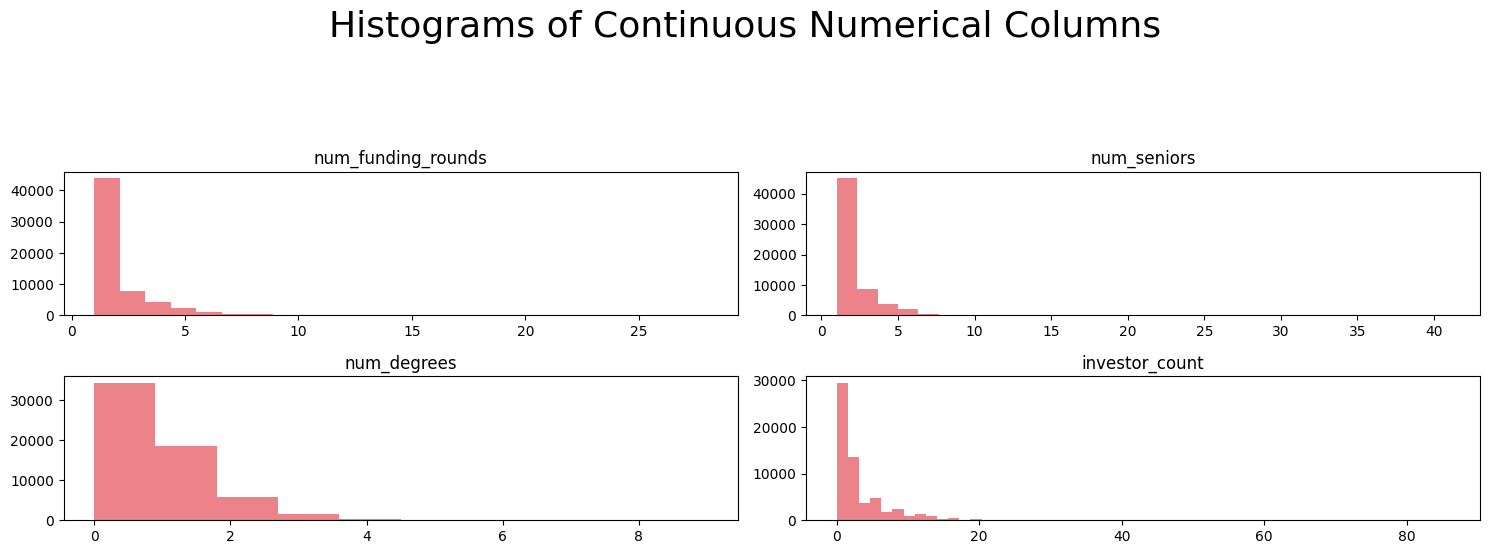

In [ ]:
def histogram_numerical(df_continous, df_num = df_num):
  fig = plt.figure(figsize=(15, 12))
  plt.suptitle('Histograms of Continuous Numerical Columns\n', horizontalalignment="center",
                fontsize=26)
  for i in range(df_continuous.shape[1]):
      plt.subplot(5, 2, i+1)
      f = plt.gca()
      f.set_title(df_num.columns.values[i])
      vals = np.size(df_num.iloc[:, i].unique())
      plt.hist(df_num.iloc[:, i], bins=vals, color='#ec838a')
      plt.tight_layout(rect=[0, 0.03, 1, 0.95])
      if vals >= 100:
          vals = 100
  plt.show()

histogram_numerical(df_continuous)

We notice that there are mostly men in senior positions and this is a shame. To solve this imbalance in data, we will transform this into an "all_male" binary variable that is 1 if all seniors are males and 0 else

In [ ]:
df.all_male.value_counts()

1    42877
0    17628
Name: all_male, dtype: int64

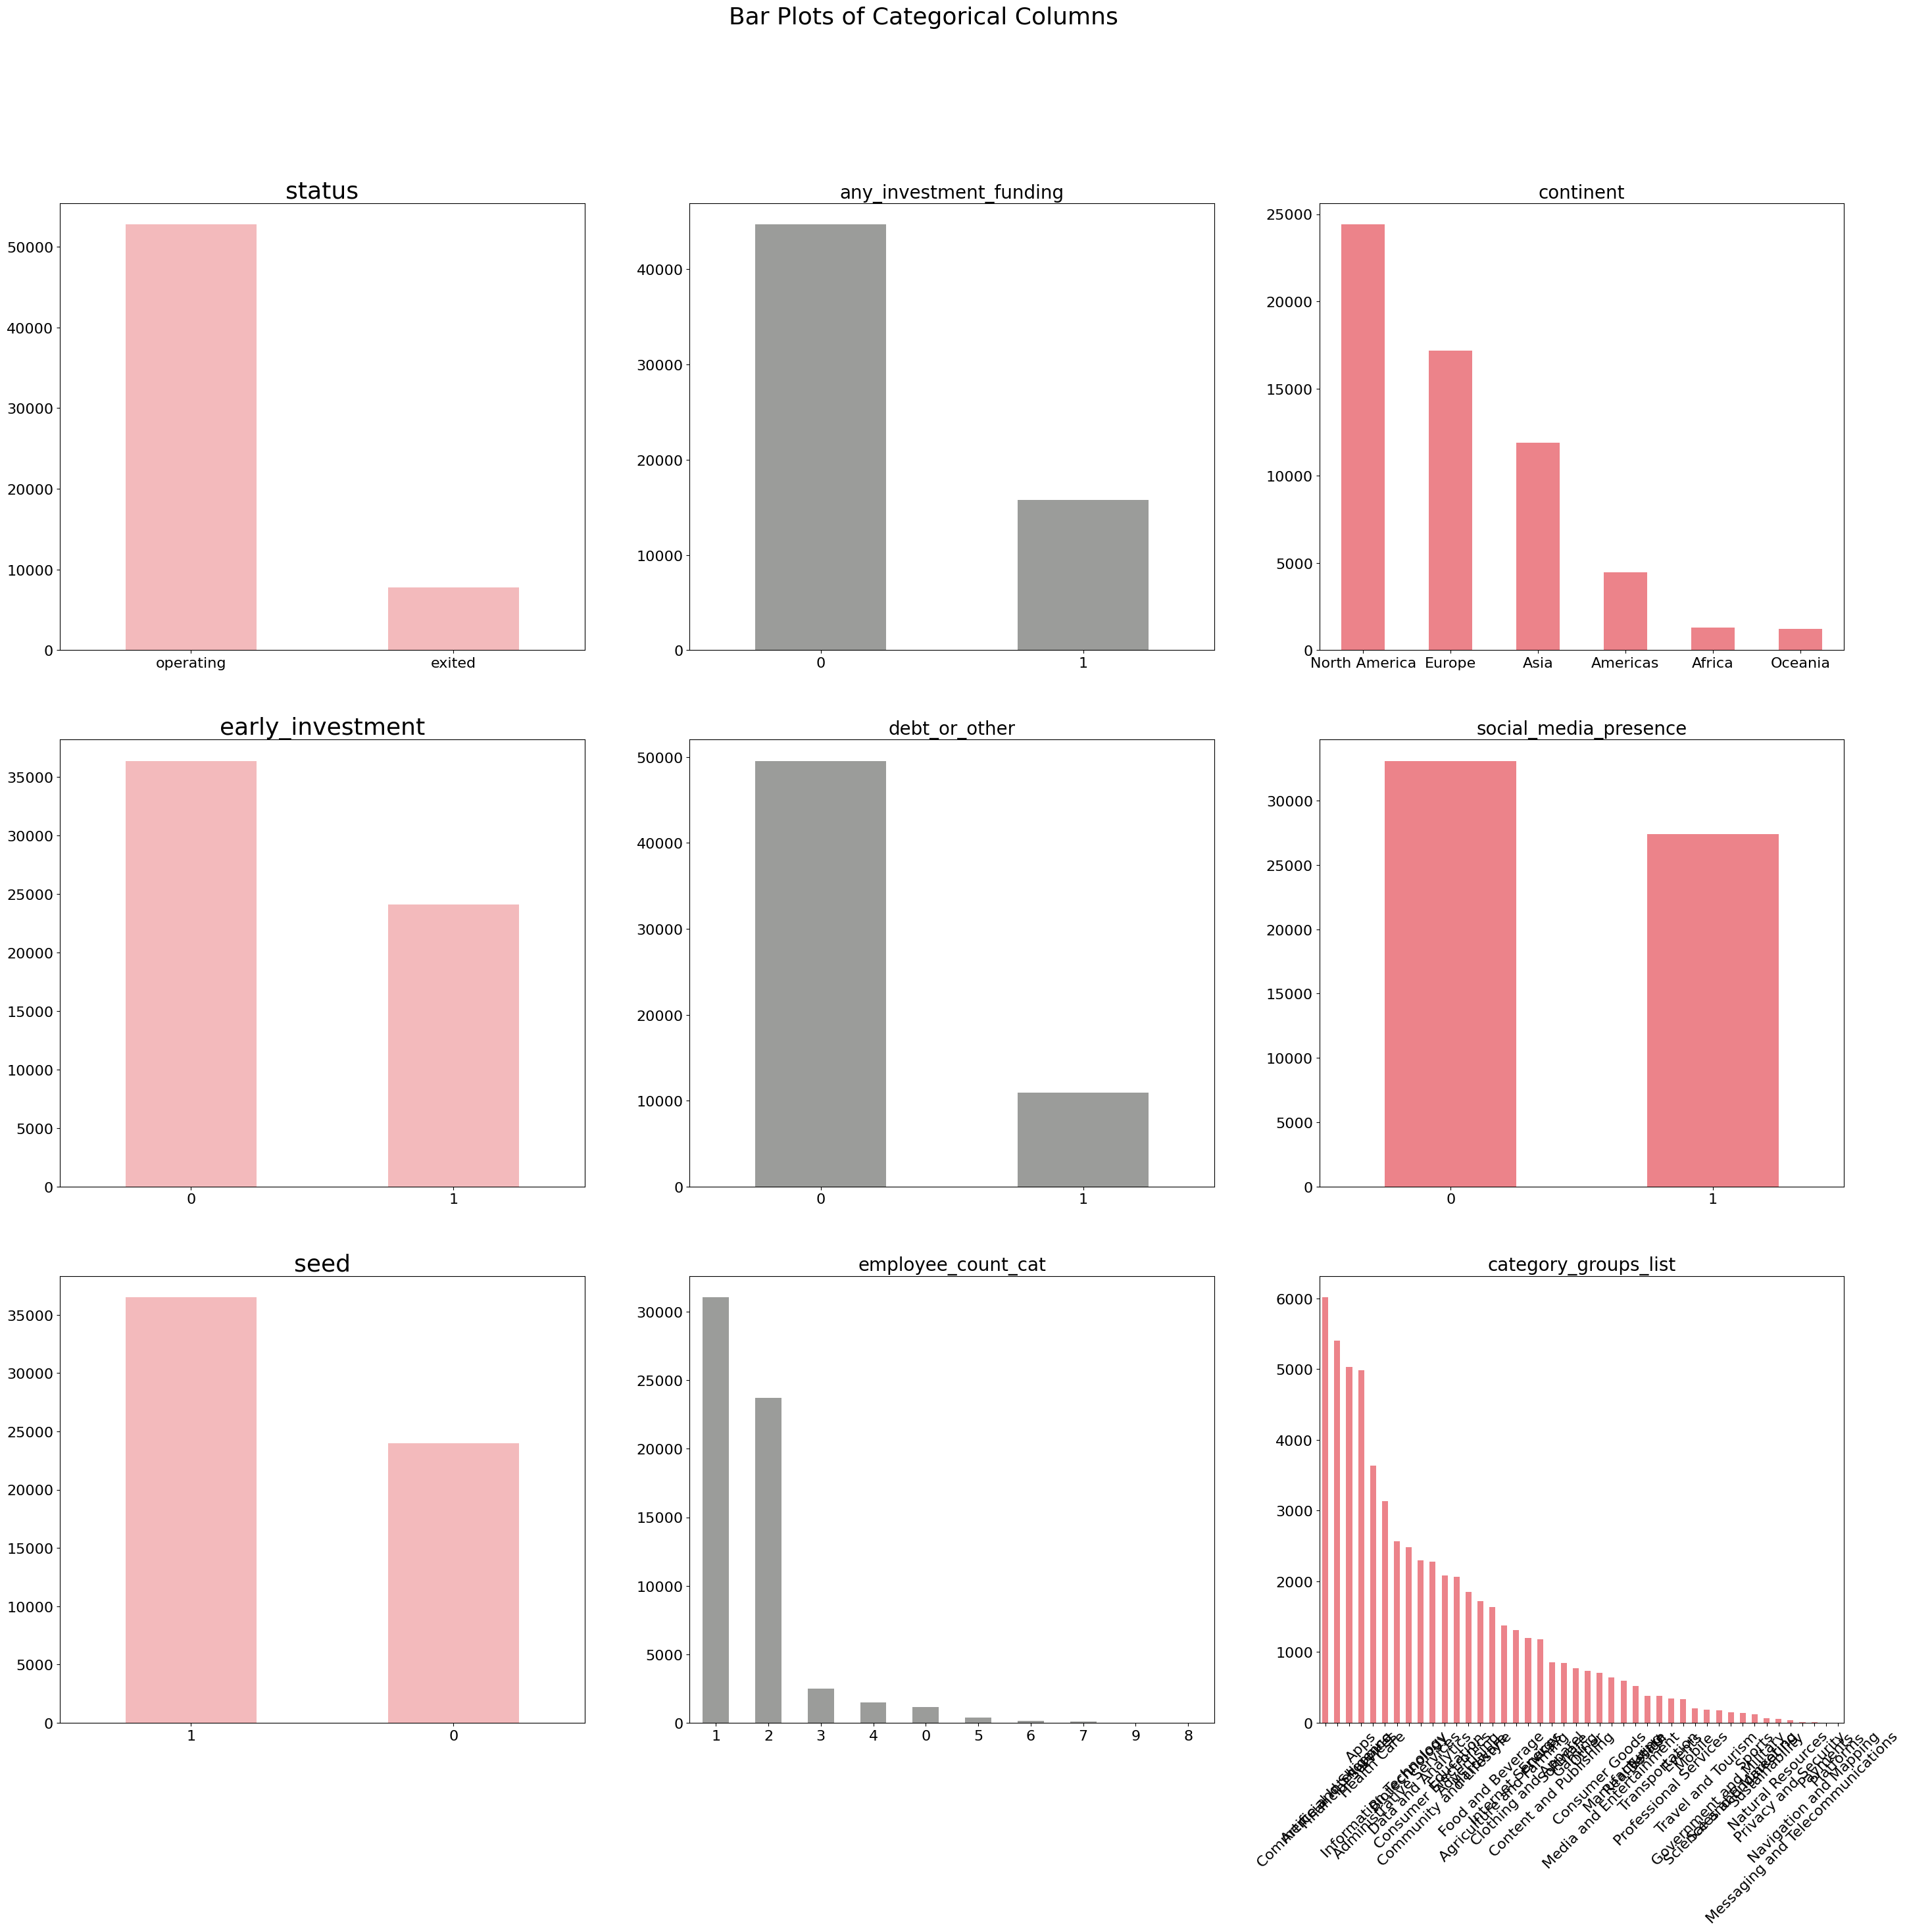

In [ ]:
def barplot_cat(df_cat, df=df):
  fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 30))
  plt.suptitle('Bar Plots of Categorical Columns\n', horizontalalignment="center",
                fontsize=26)
  for i, item in enumerate(df_cat):
      if i < 3:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color='#f3babc')
          ax.set_title(item, fontdict={'fontsize': 26})

      elif i >= 3 and i < 6:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0, color='#9b9c9a')
          ax.set_title(item, fontdict={'fontsize': 20})

      elif i < 8:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0, color='#ec838a')
          ax.set_title(item, fontdict={'fontsize': 20})

      elif i == 8:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=45, color='#ec838a')
          ax.set_title(item, fontdict={'fontsize': 20})

      ax.tick_params(axis='x', labelsize=16)
      ax.tick_params(axis='y', labelsize=16)

  plt.show()

barplot_cat(df_cat)

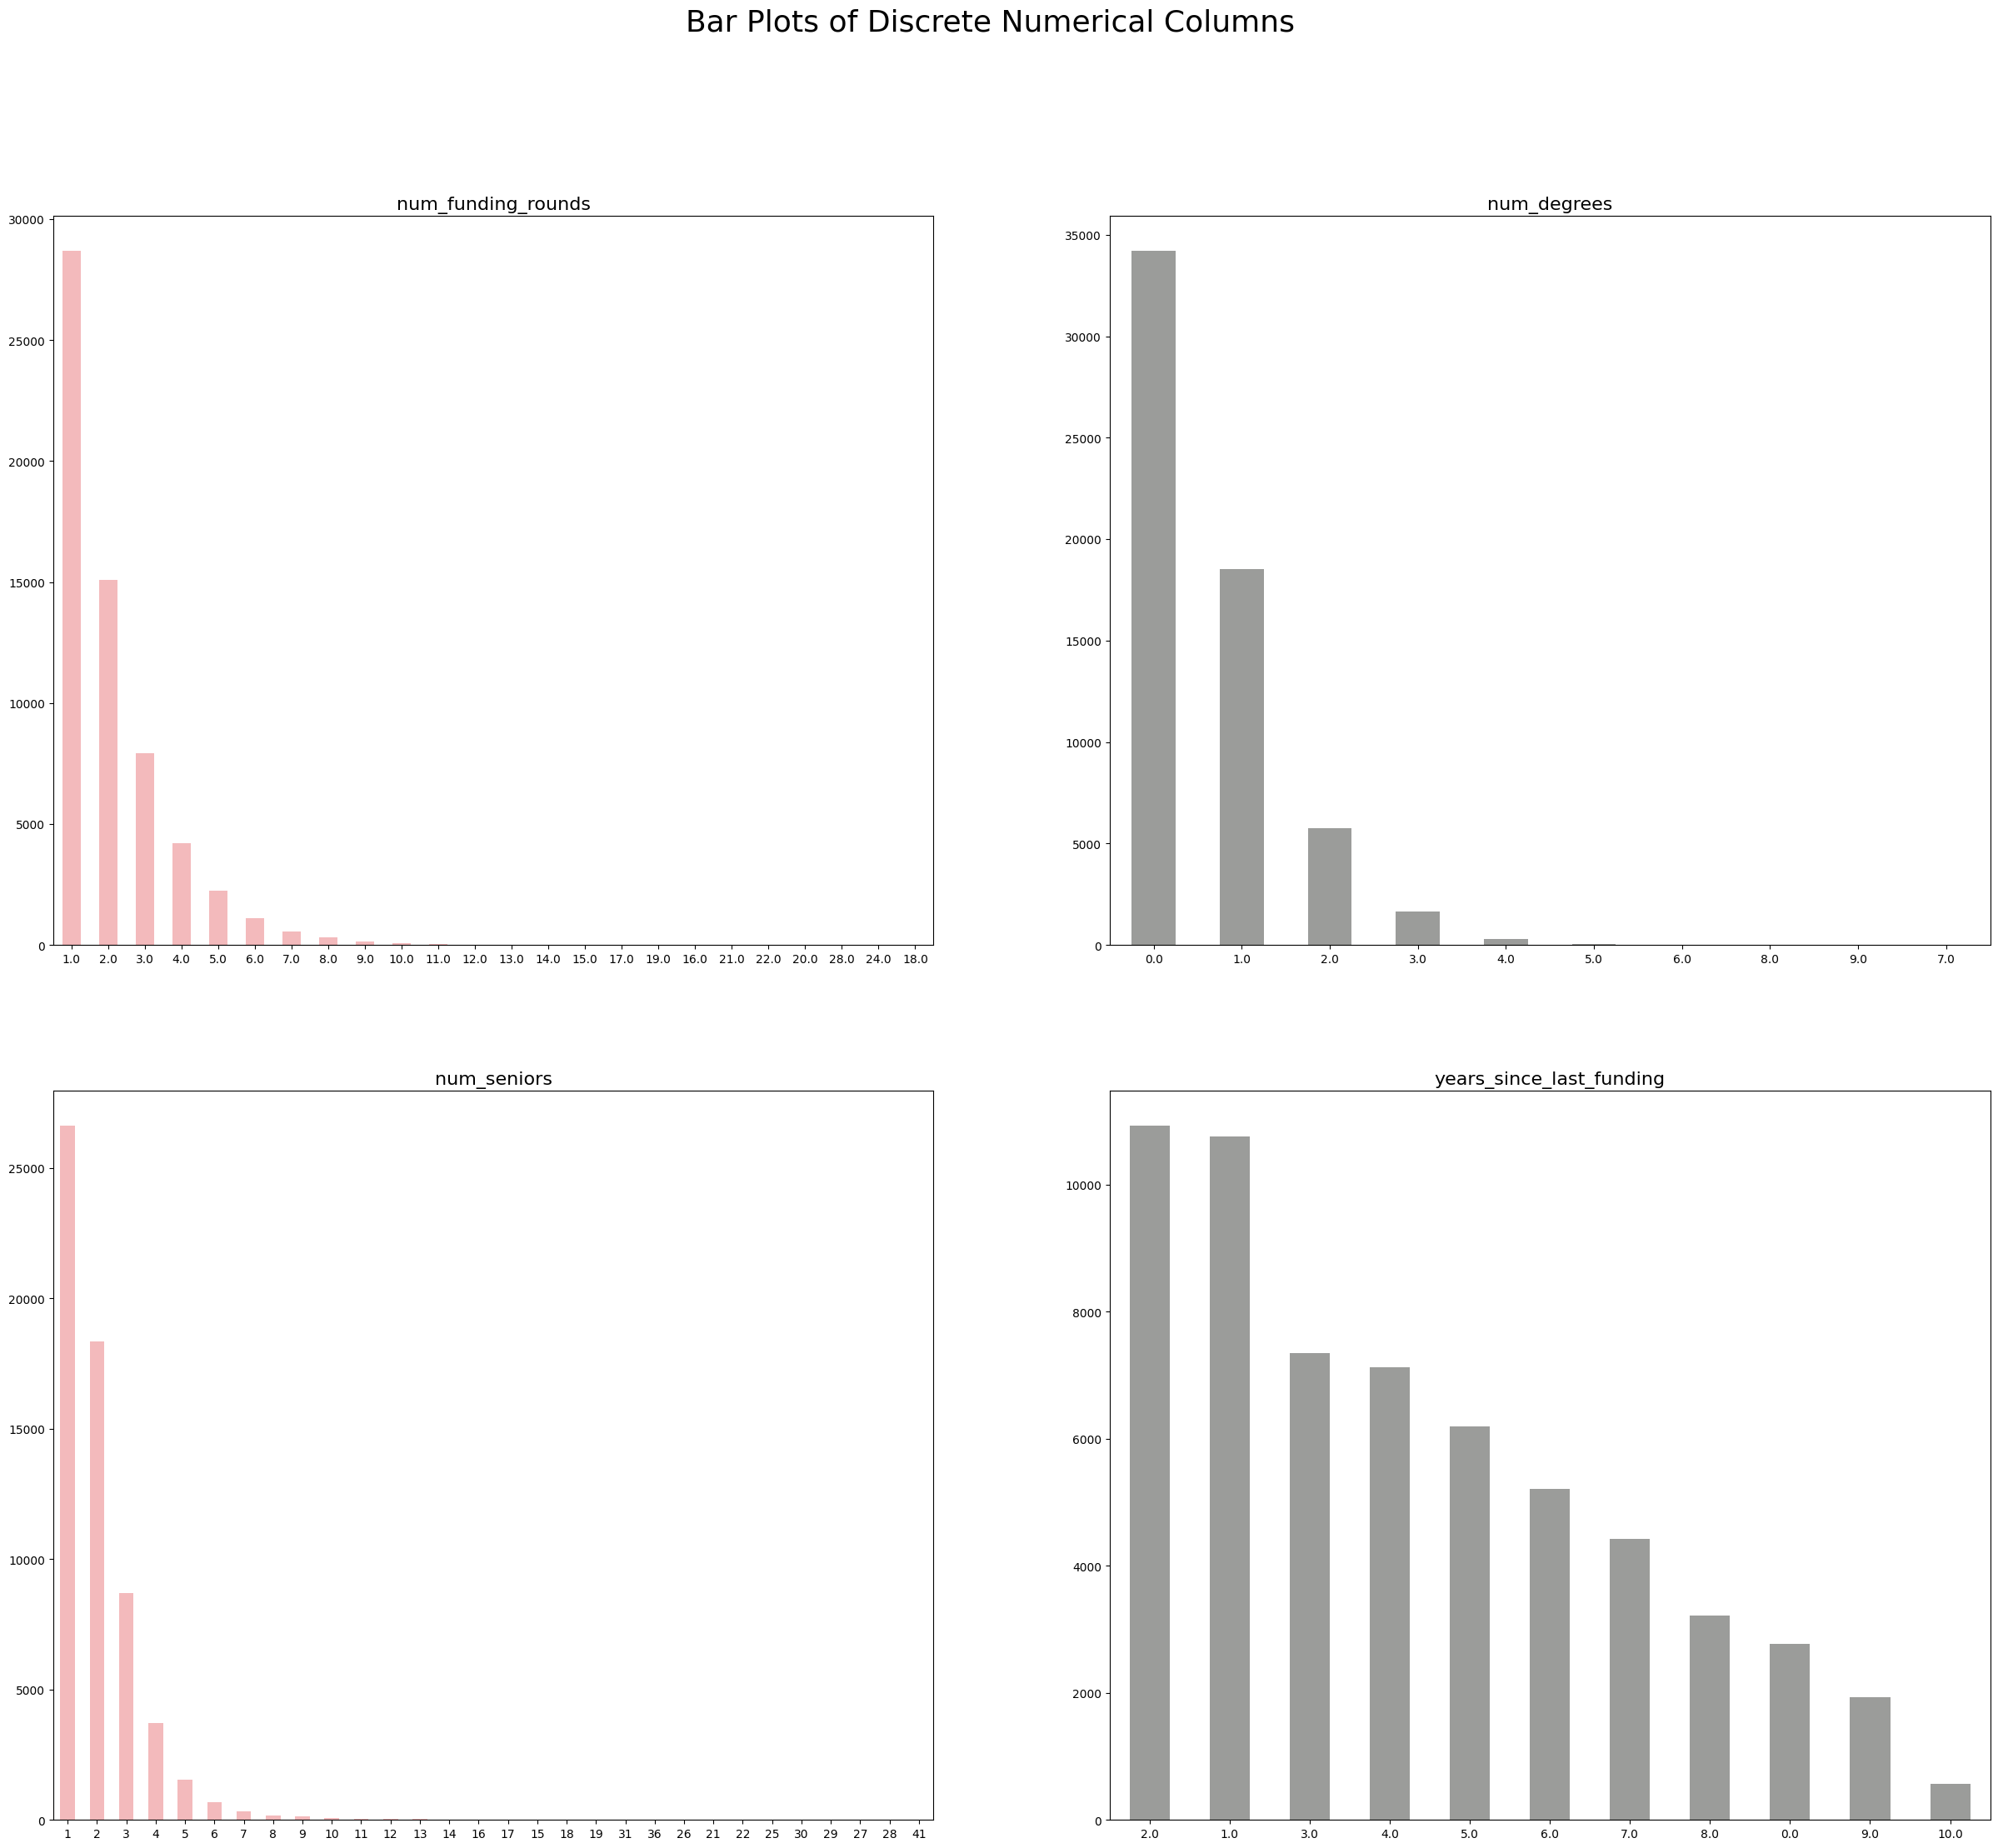

In [ ]:
def barplot_disc(df_discrete, df=df):
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 25))
  plt.suptitle('Bar Plots of Discrete Numerical Columns\n', horizontalalignment="center",
                fontsize=26)
  for i, item in enumerate(df_discrete):
      if i < 2:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color='#f3babc')
          ax.set_title(item, fontdict={'fontsize': 16})

      elif i >= 2 and i < 4:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 2, 1], rot=0, color='#9b9c9a')
          ax.set_title(item, fontdict={'fontsize': 16})

      elif i < 9:
          ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0, color='#ec838a')
          ax.set_title(item, fontdict={'fontsize': 16})
  plt.show()


barplot_disc(df_discrete)

In [ ]:
df_discrete.describe()

,num_funding_rounds,num_seniors,num_degrees,years_since_last_funding
count,60505.000000,60505.000000,60505.000000,60505.000000
mean,2.108256,2.051235,0.603487,3.723692
std,1.548934,1.468324,0.822650,2.490132
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000
50%,2.000000,2.000000,0.000000,3.000000
75%,3.000000,3.000000,1.000000,6.000000
max,28.000000,41.000000,9.000000,10.000000


In [ ]:
# counts = df['all_male'].value_counts()
# counts.plot(kind='bar', rot=0)
# plt.title('Male Senior Binary')
# plt.xlabel('Value')
# plt.ylabel('Count')
# plt.show()

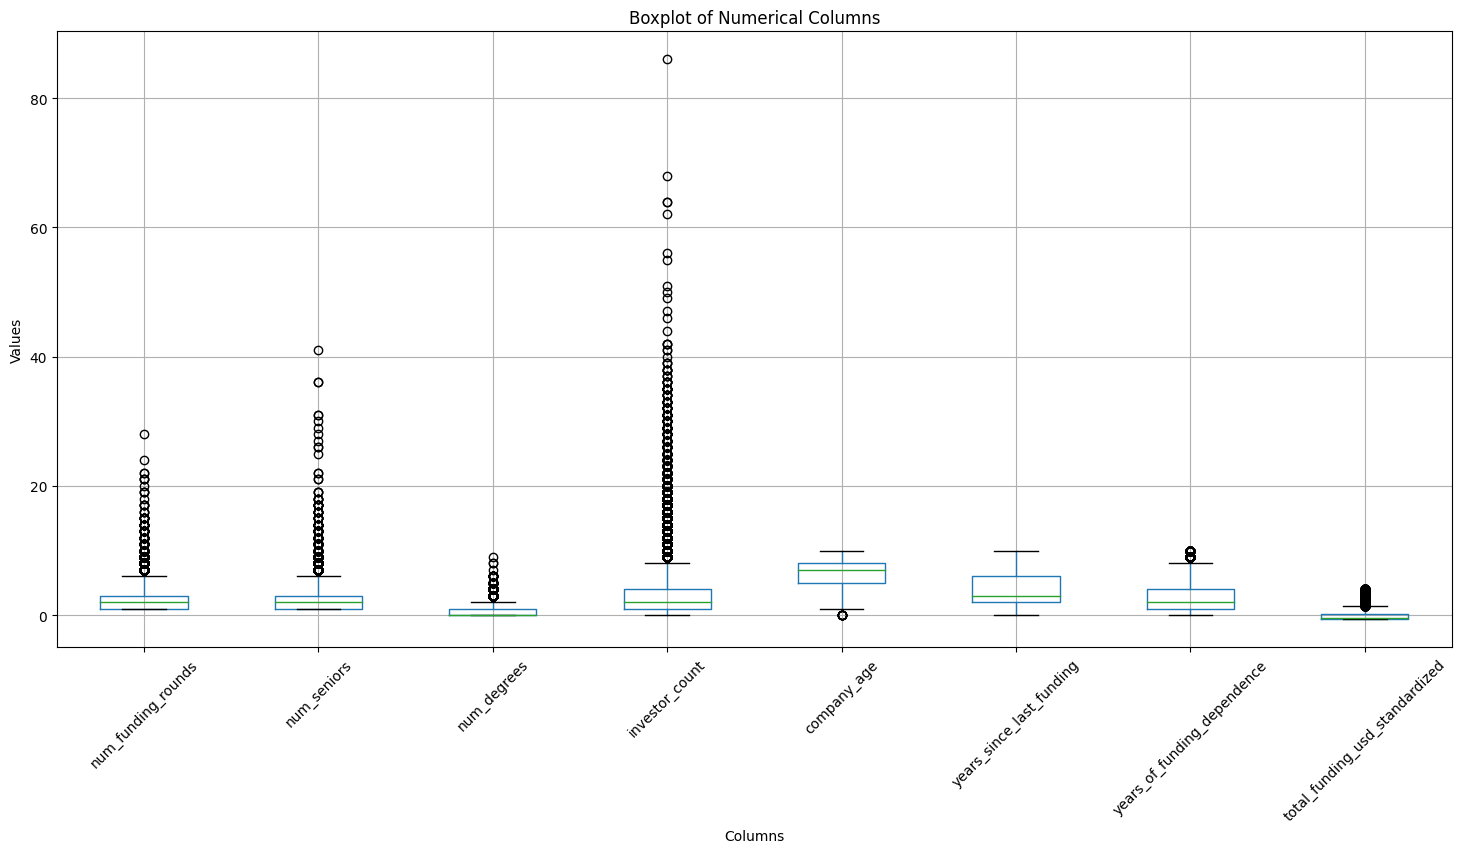

In [ ]:
df_num.boxplot(figsize=(18,8))

# set plot title and axis labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

#rotate the xlabels
plt.xticks(rotation=45)

# show the plot
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Explore target label
target_instance = df["status"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Section'})
fig = px.pie(target_instance, values='status', names='Section', title='Partition of Churn in dataset')
fig.show()

## Vizzes without outliers

In [ ]:
df_num.columns

Index(['num_funding_rounds', 'num_seniors', 'num_degrees', 'investor_count',
       'company_age', 'years_since_last_funding',
       'years_of_funding_dependence', 'total_funding_usd_standardized'],
      dtype='object')

In [ ]:
# Calculate the IQR for each numerical column
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))

# Remove outliers from the original dataset
df_cleaned = df[~outliers.any(axis=1)]

In [ ]:
df = df_cleaned.copy()

In [ ]:
# Select categorical columns
df_cat = categorical(df)

#Select numerical columns
df_num = numerical(df)


In [ ]:
df_discrete = discrete(df_num)

df_continuous = continuous(df_num)

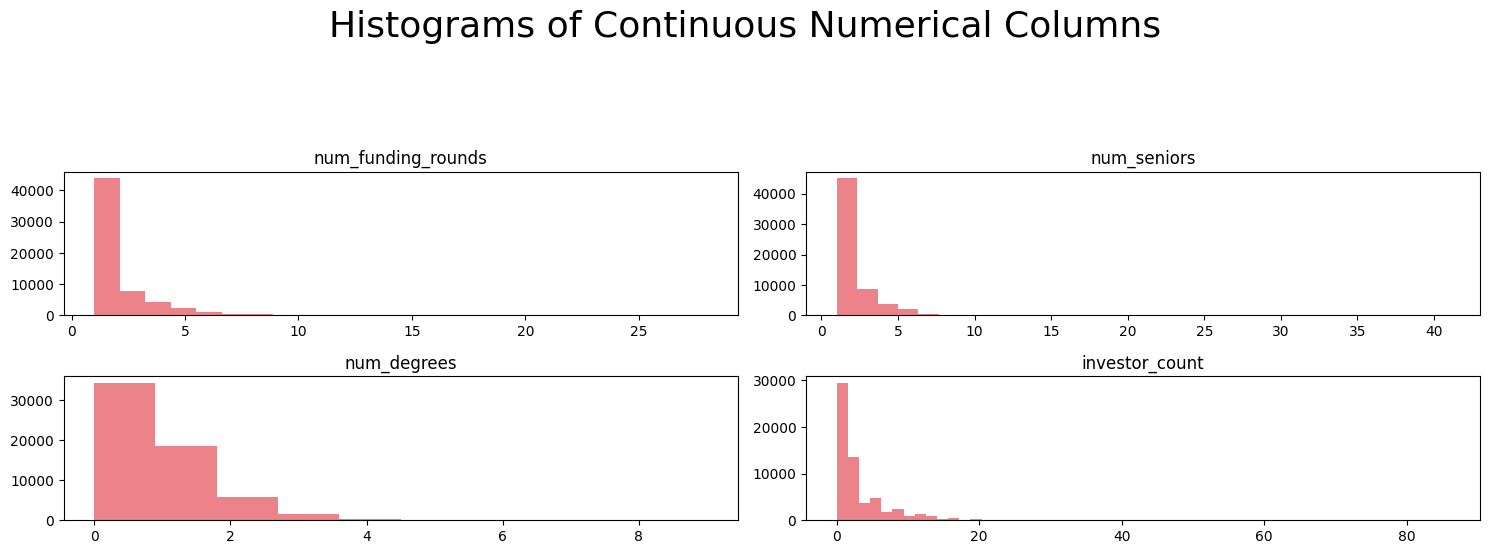

In [ ]:
histogram_numerical(df_continuous)

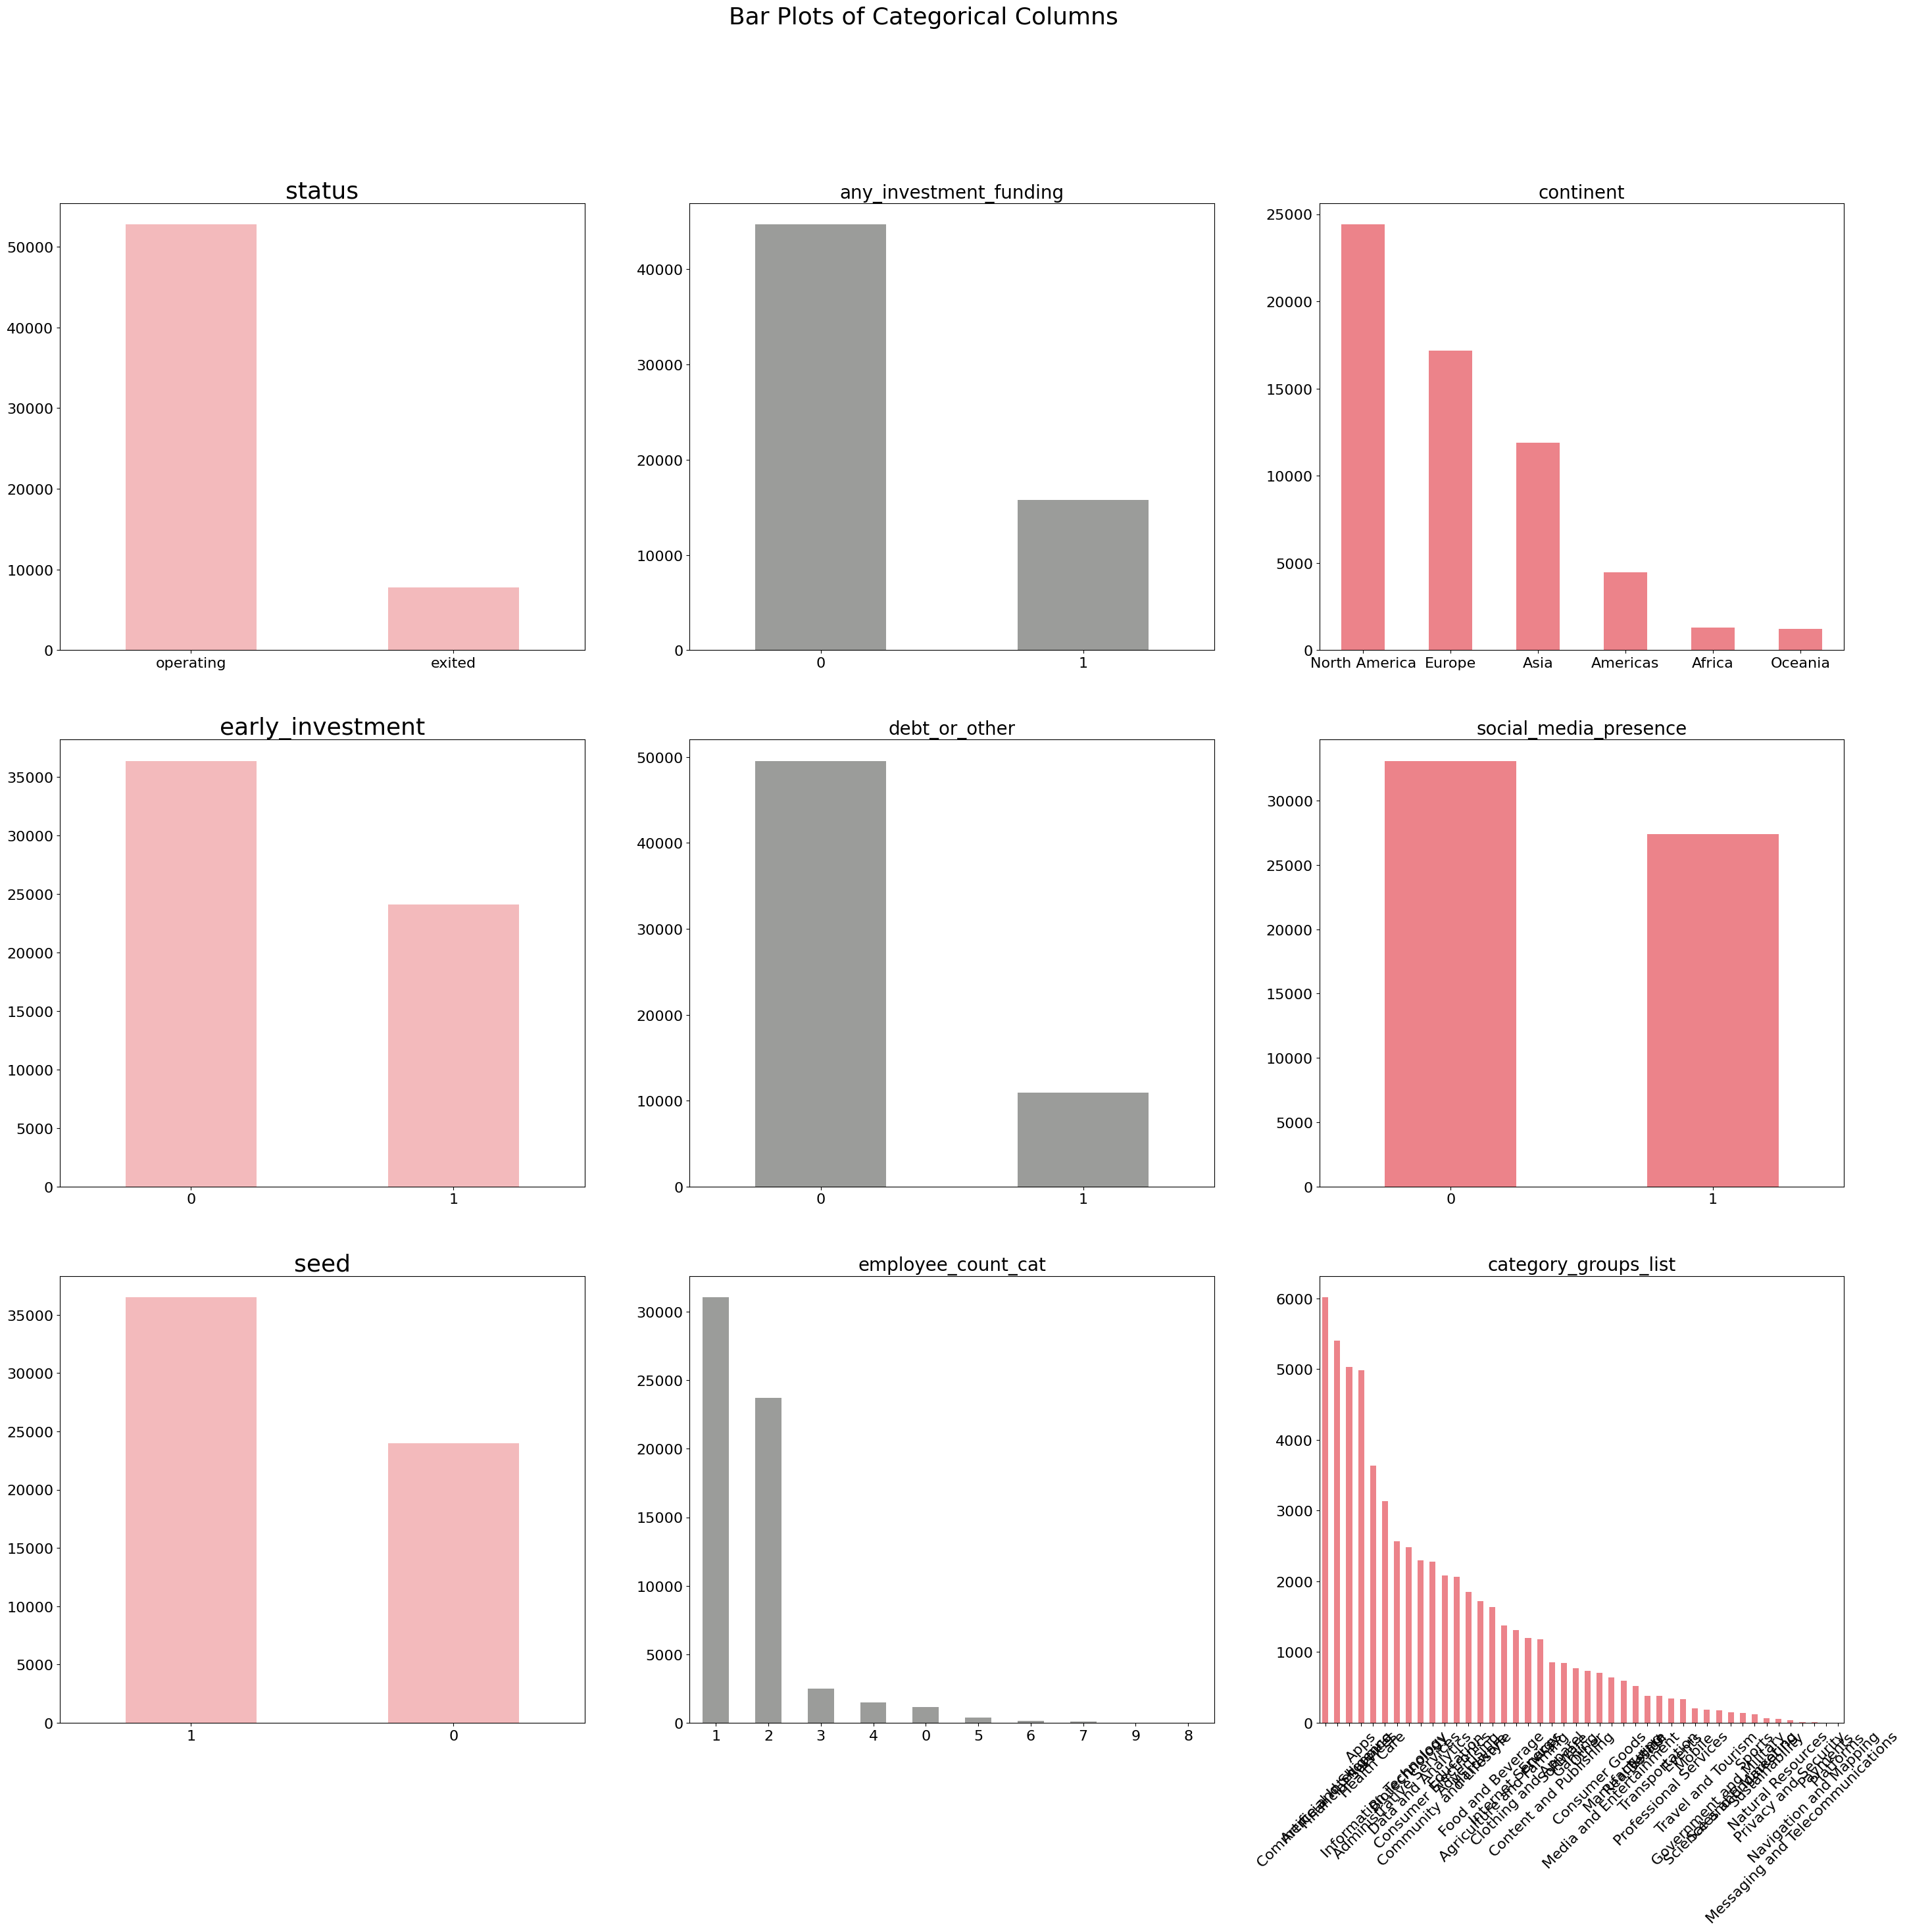

In [ ]:
barplot_cat(df_cat)

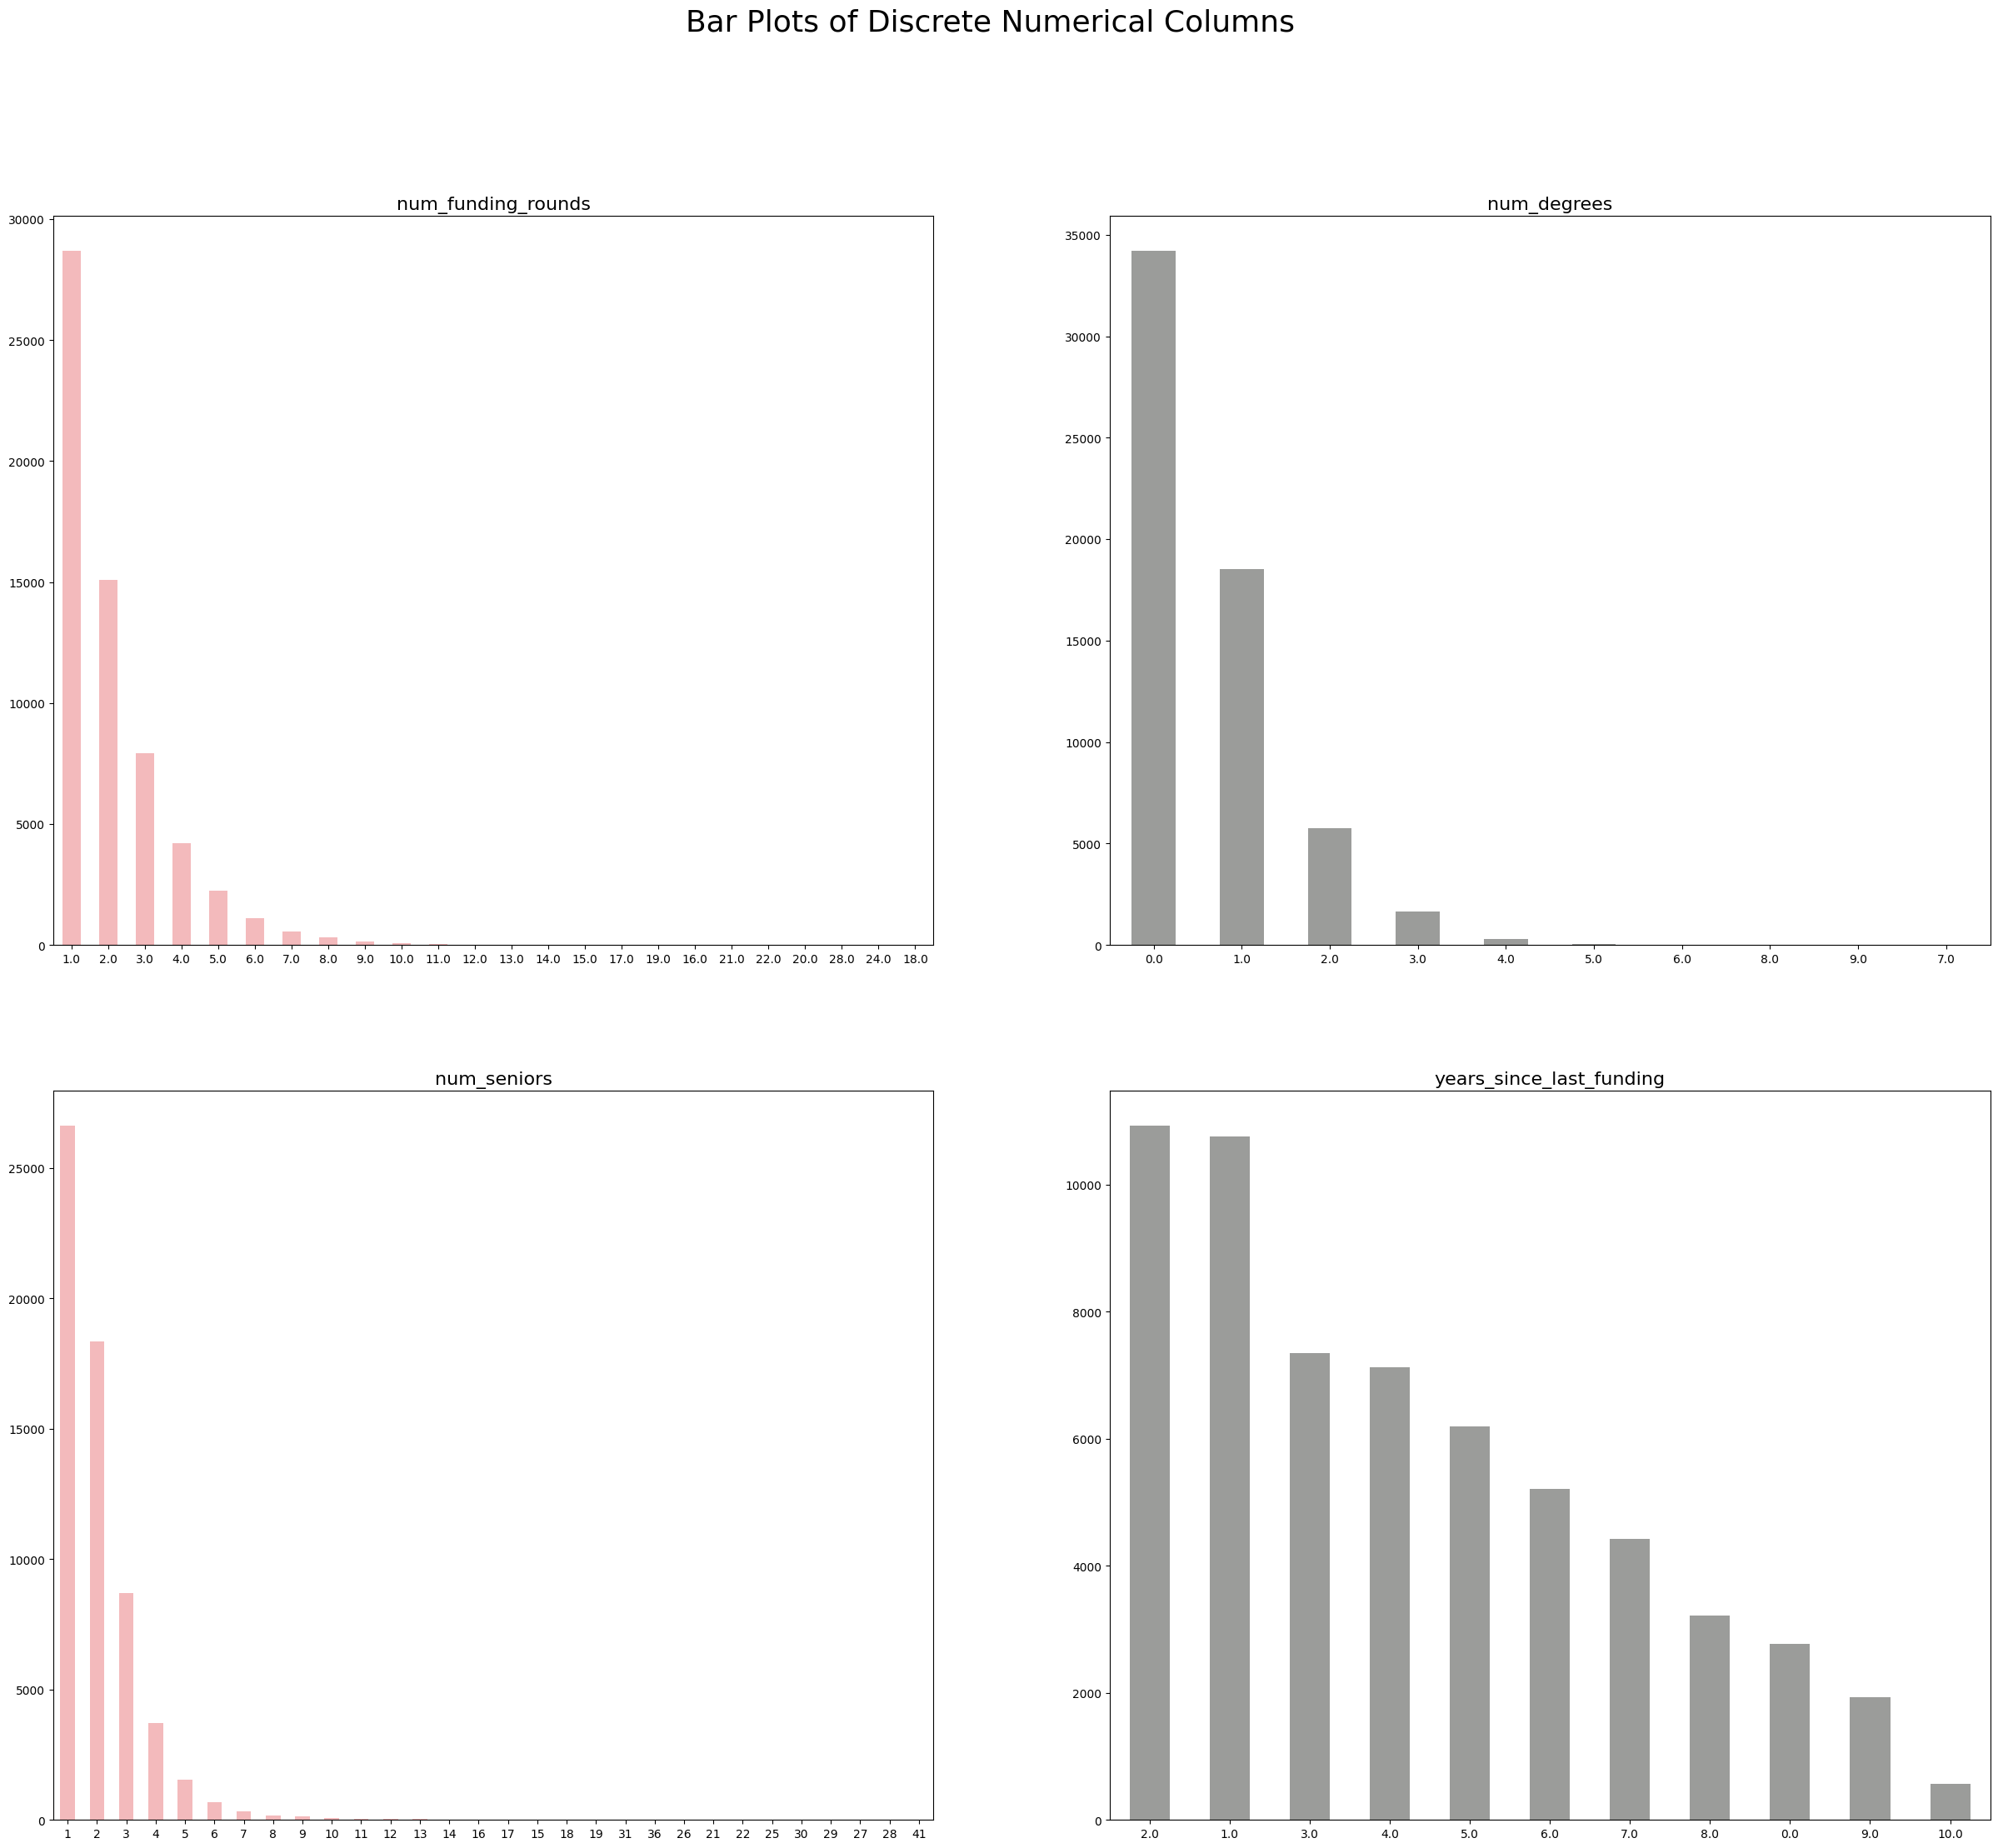

In [ ]:
barplot_disc(df_discrete)

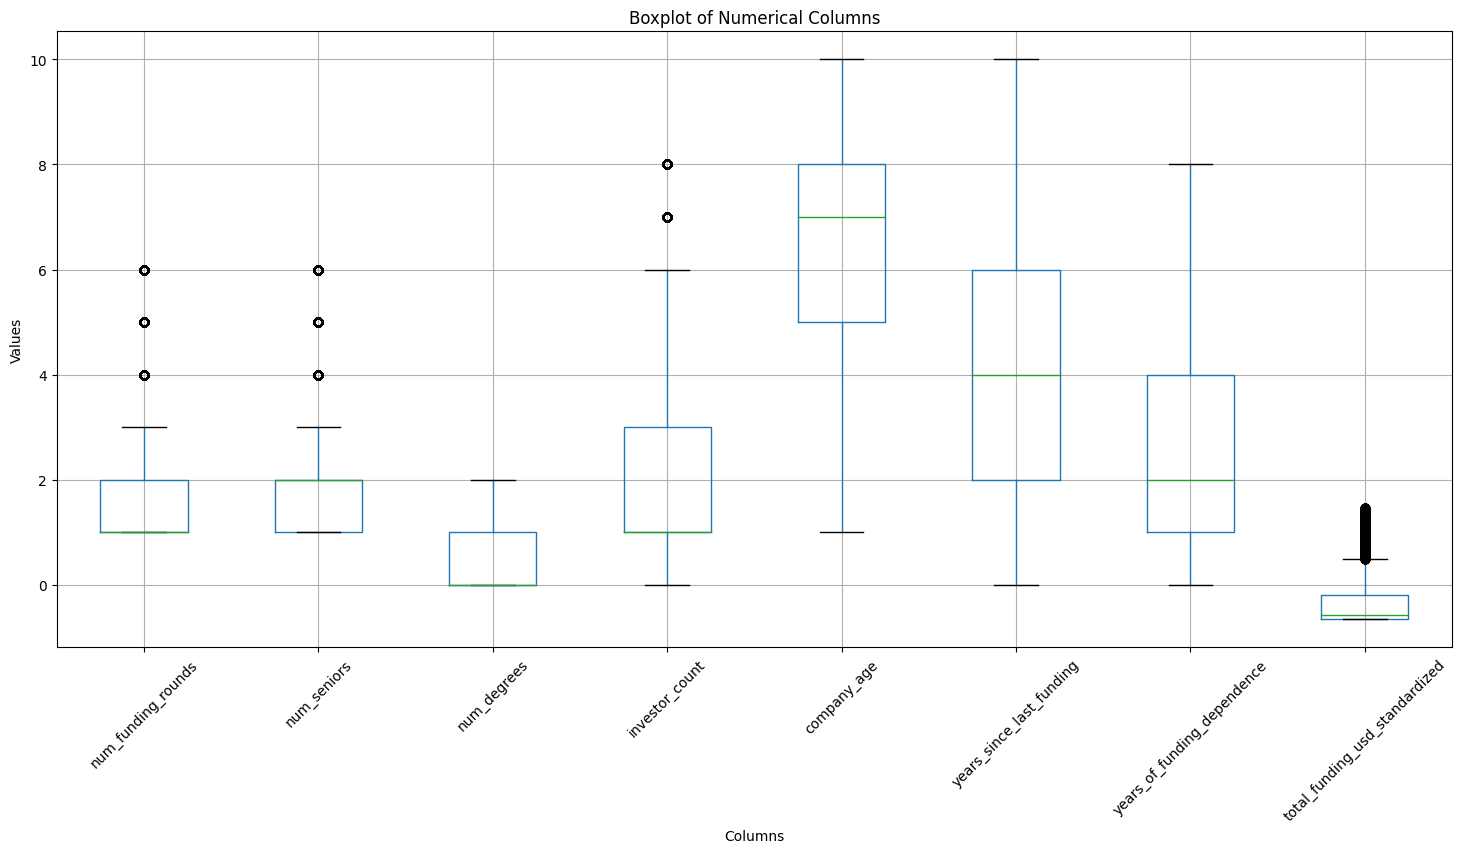

In [ ]:
df_num.boxplot(figsize=(18,8))

# set plot title and axis labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

#rotate the xlabels
plt.xticks(rotation=45)

# show the plot
plt.show()

In [ ]:
# # print statistics for each numerical column
# for col in df_num.columns:
#     print(col)
#     print('Median:', df_num[col].median())
#     print('Mean:', df_num[col].mean())
#     print('Q1:', df_num[col].quantile(0.25))
#     print('Q3:', df_num[col].quantile(0.75))
#     print("Variance", df_num[col].var())
#     print('Standard Deviation:', df_num[col].std())
#     print()

In [ ]:
# Explore target label
target_instance = df["status"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Section'})
fig = px.pie(target_instance, values='status', names='Section', title='Partition of Churn in dataset')
fig.show()

##Bivariate Analysis

In [ ]:
import plotly.express as px

In [ ]:
# Defining histogram function for bivariate analysis
def hist(feature):
    group_df = df.groupby([feature, 'status']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    figure = px.histogram(group_df, x=feature, y='Count', color='status', marginal='box', title=f'Status frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    figure.show()

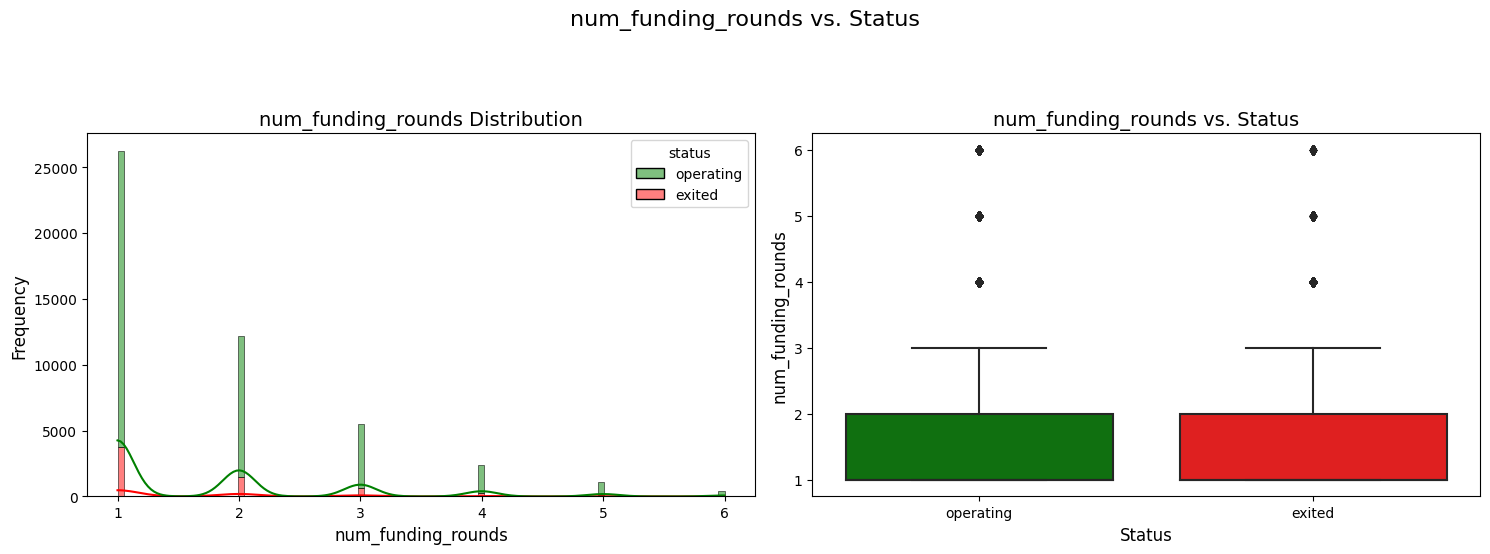

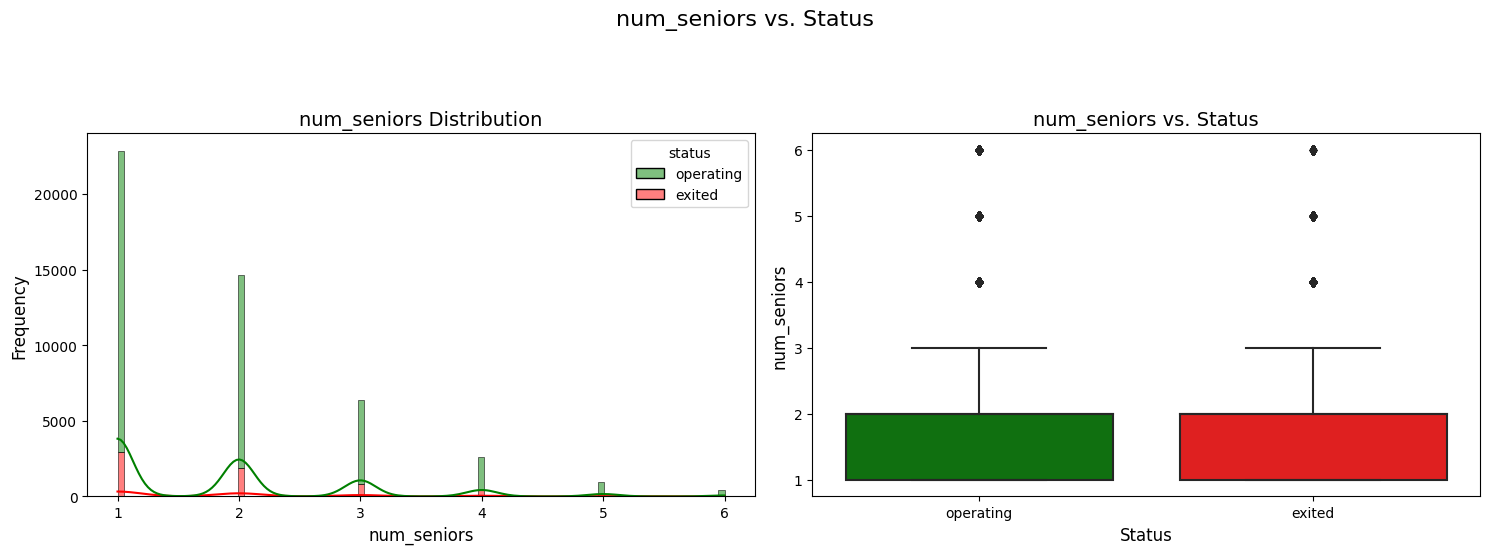

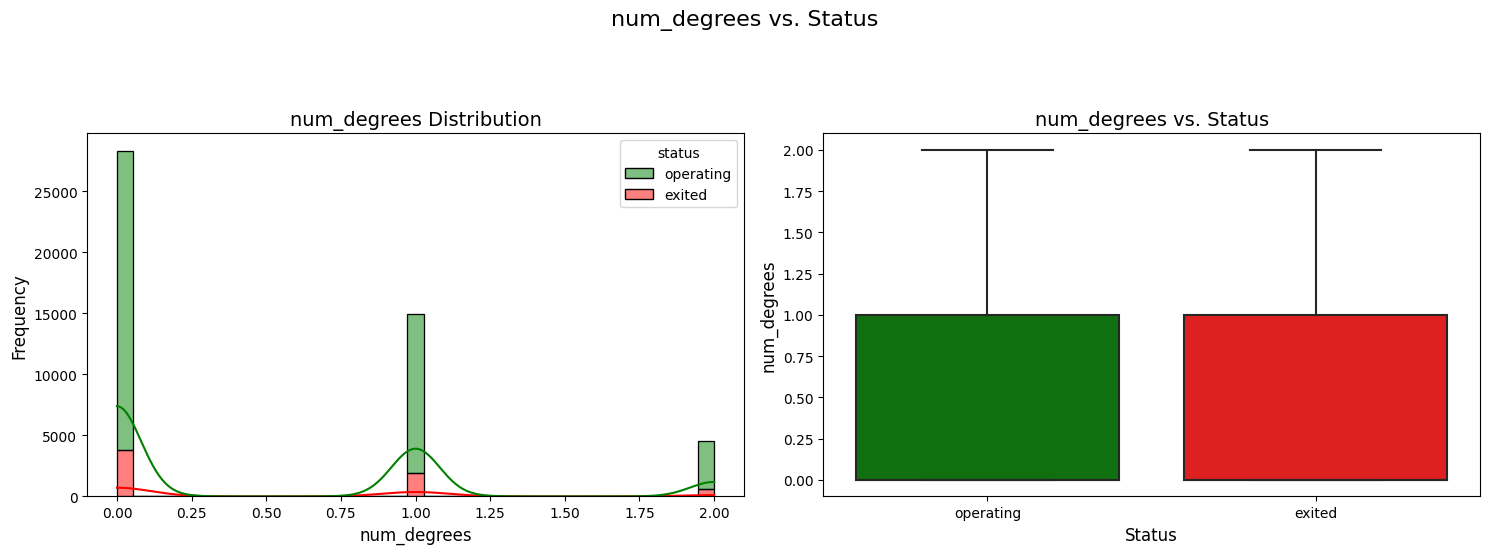

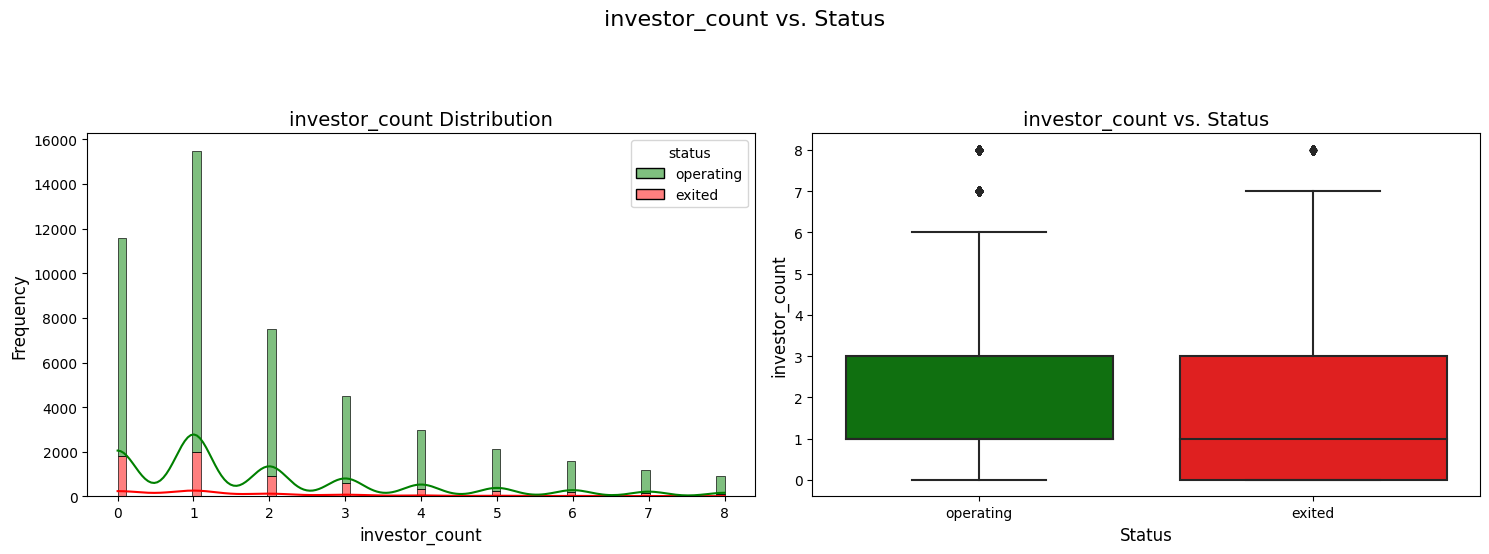

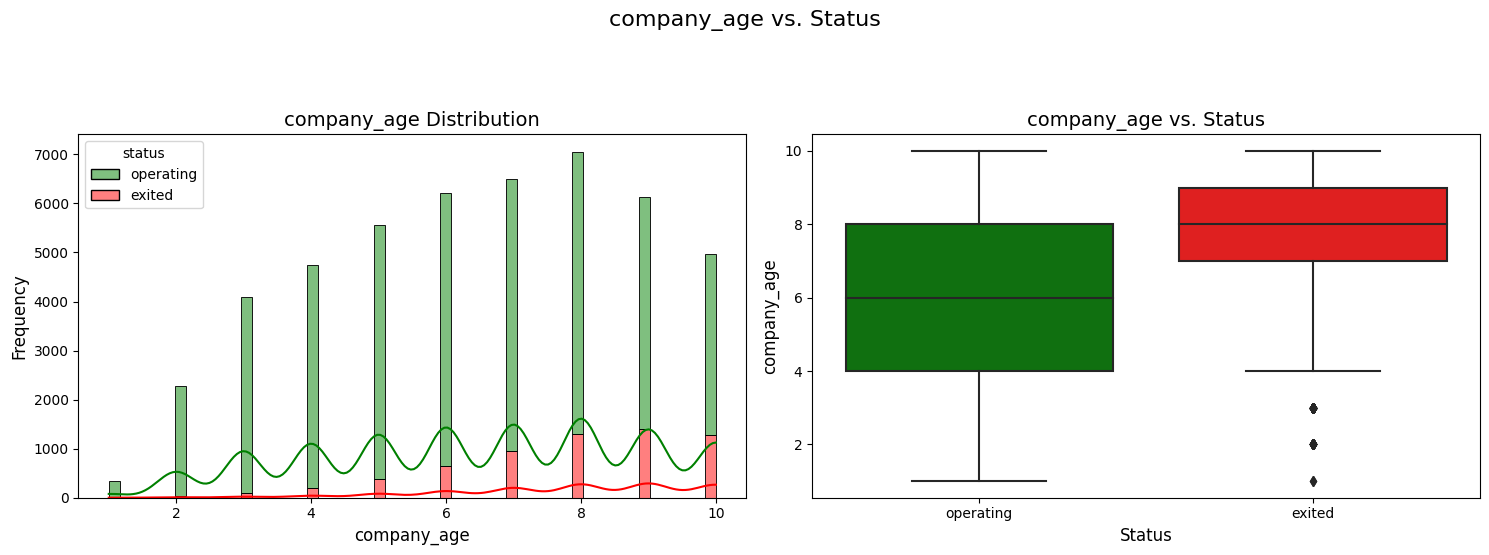

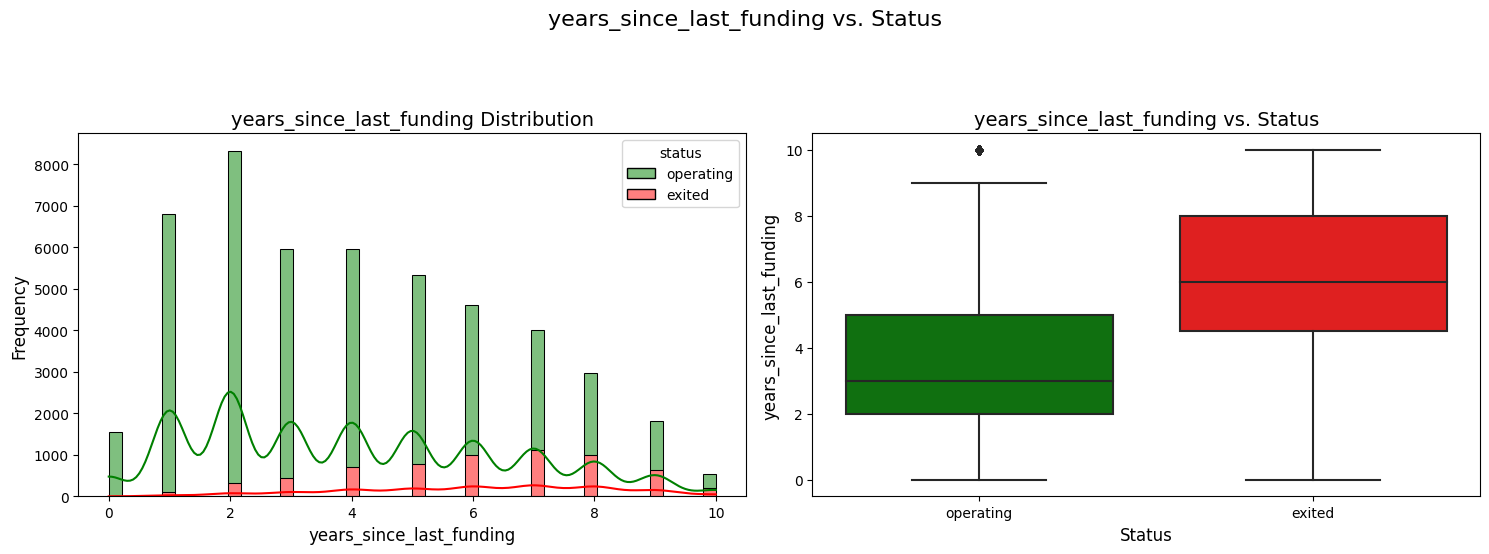

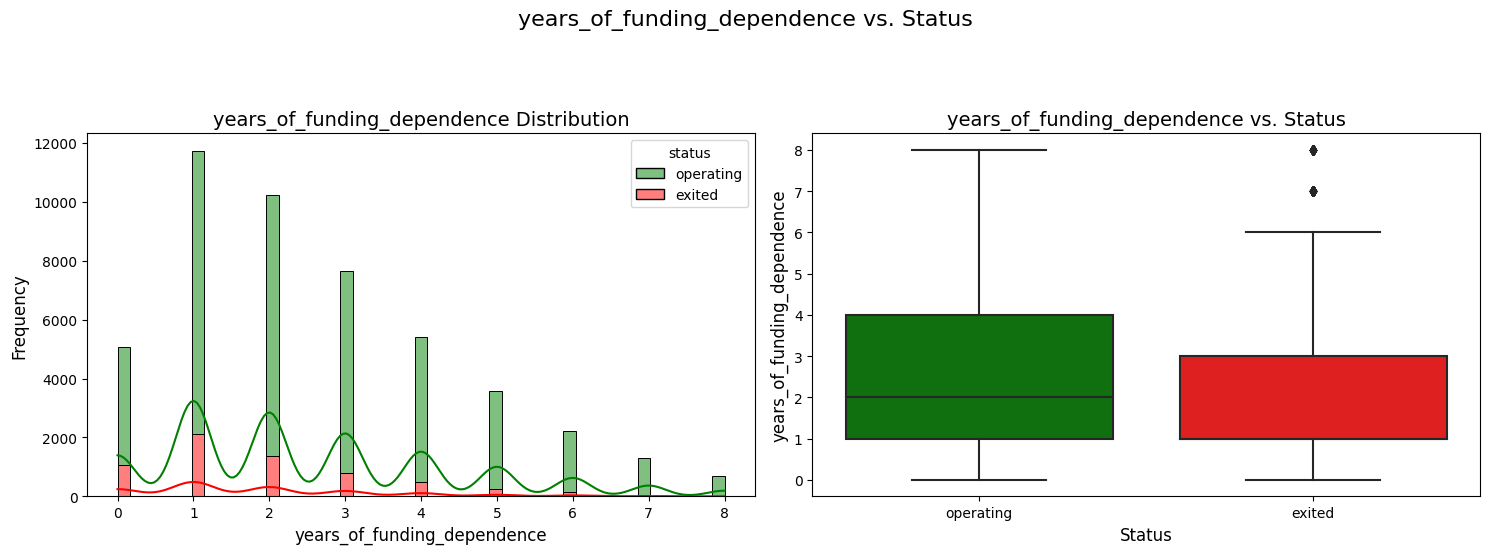

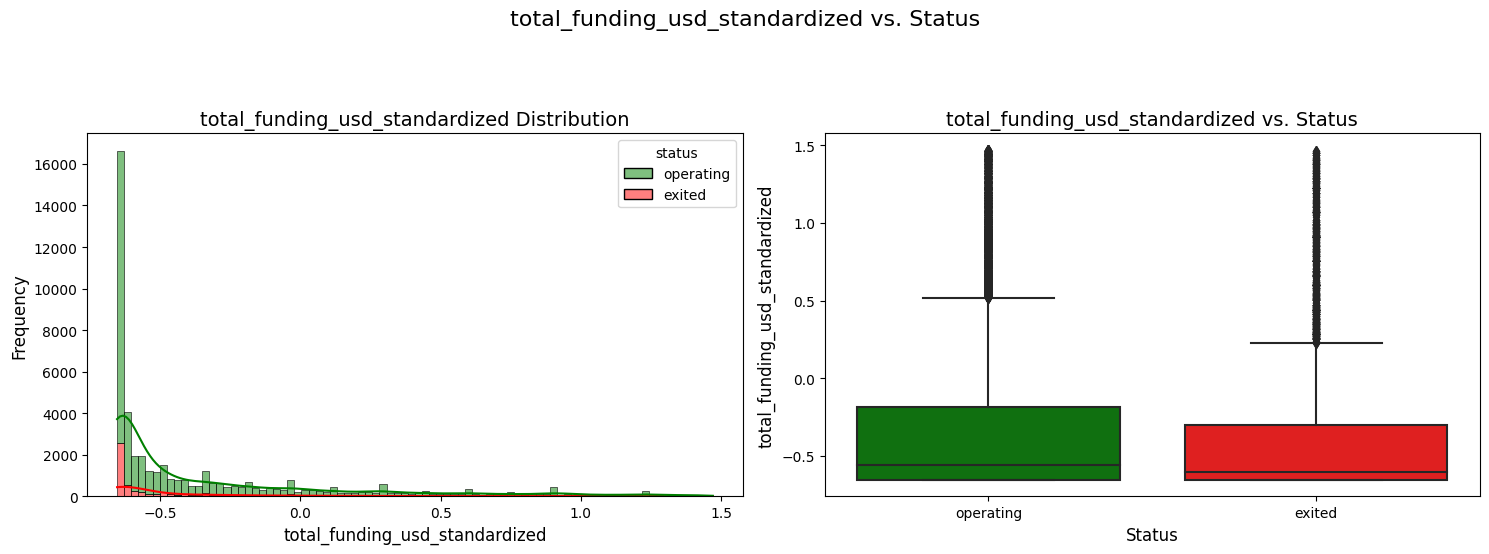

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#defining boxplot for numerical vars in bivariate analysis
def hist_box(feature, df):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    fig.suptitle(f"{feature} vs. Status", fontsize=16, y=1.1)

    sns.histplot(x=feature, hue='status', data=df, ax=axes[0], kde=True, multiple="stack", palette=["green", "red"])
    axes[0].set_xlabel(feature, fontsize=12)
    axes[0].set_ylabel("Frequency", fontsize=12)
    axes[0].set_title(f"{feature} Distribution", fontsize=14)

    sns.boxplot(x='status', y=feature, data=df, ax=axes[1], palette=["green", "red"])
    axes[1].set_xlabel("Status", fontsize=12)
    axes[1].set_ylabel(feature, fontsize=12)
    axes[1].set_title(f"{feature} vs. Status", fontsize=14)

    plt.tight_layout()
    plt.show()

for col in df_num.columns:
    hist_box(col, df)

In [ ]:
median_by_status = df.groupby('status')['num_funding_rounds'].mean()
print(median_by_status)

status
exited       1.667511
operating    1.790314
Name: num_funding_rounds, dtype: float64


In [ ]:
df_cat = df_cat.drop(['status'], axis=1)

In [ ]:
#Define bar plots for bivariate analysis
def bar(feature, df=df):
    # Groupby the categorical feature
    temp_df = df.groupby([feature, 'status']).size().reset_index()
    temp_df = temp_df.rename(columns={0: 'Count'})

    # Calculate the total count for each category of the categorical feature
    category_counts = temp_df.groupby(feature)['Count'].sum().reset_index()
    category_counts = category_counts.rename(columns={'Count': 'total_count'})

    # Merge the category counts with the temp_df
    temp_df = temp_df.merge(category_counts, on=feature)

    # Calculate the percentage of each status within each category
    temp_df['percentage'] = round(temp_df['Count'] / temp_df['total_count'] * 100, 1)

    # Setting graph framework
    fig = px.bar(temp_df, x=feature, y='percentage', color='status', title=f'Status by {feature}', barmode="group",
                 color_discrete_sequence=["green", "red"])

    return fig.show()


In [ ]:
for feature in df_cat:
  bar(feature, df)

##Let the modelling begin!

In [ ]:
def to_numeric(s):
  if s == "operating":
    return 1
  elif s == "exited":
    return 0

df_inter = df.copy()
df_inter["status"] = df["status"].apply(to_numeric)

In [ ]:
df_num = pd.merge(df_num, df_inter[['status']], left_index=True, right_index=True)

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df['continent'] = labelencoder.fit_transform(df['continent']) # using label encoder on continent
df['category_groups_list'] = labelencoder.fit_transform(df['category_groups_list']) # using label encoder on category groups

In [ ]:
df["status"] = df["status"].apply(to_numeric)

In [ ]:
X = df.drop('status', axis=1) # drop the target variable from X
y = df['status']

In [ ]:
# Split your data into training and testing sets
X_train_tot, X_test_tot, y_train_tot, y_test_tot = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Split training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train_tot, y_train_tot, test_size=0.2, random_state=42)

Let's upsample the minority class (exited) to deal with the class imbalance problem. Make sure to upsample only train in order to avoid data leakage!

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled data to a DataFrame
df_upsampled_train = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_upsampled_train['status'] = y_train_resampled

# Separate X and y in the upsampled training set
X_upsampled_train = df_upsampled_train.drop('status', axis=1)
y_upsampled_train = df_upsampled_train['status']

## Vizzes with upsampled train dataset

Some data vizzes to understand where we stand at now that we have upsampled the train set. Of course, this is not the whole dataset, as the test set is still the same in order to avoid any data leakage issues

In [ ]:
df_upsampled_train.status.value_counts()

1    29903
0    29903
Name: status, dtype: int64

In [ ]:
df_num_upsampled = numerical(df_upsampled_train)
df_cat_upsampled = categorical(df_upsampled_train)
df_continuous_upsampled = continuous(df_num_upsampled)
df_discrete_upsampled = discrete(df_num_upsampled)

In [ ]:
# barplot_cat(df_cat_upsampled, df_upsampled_train)

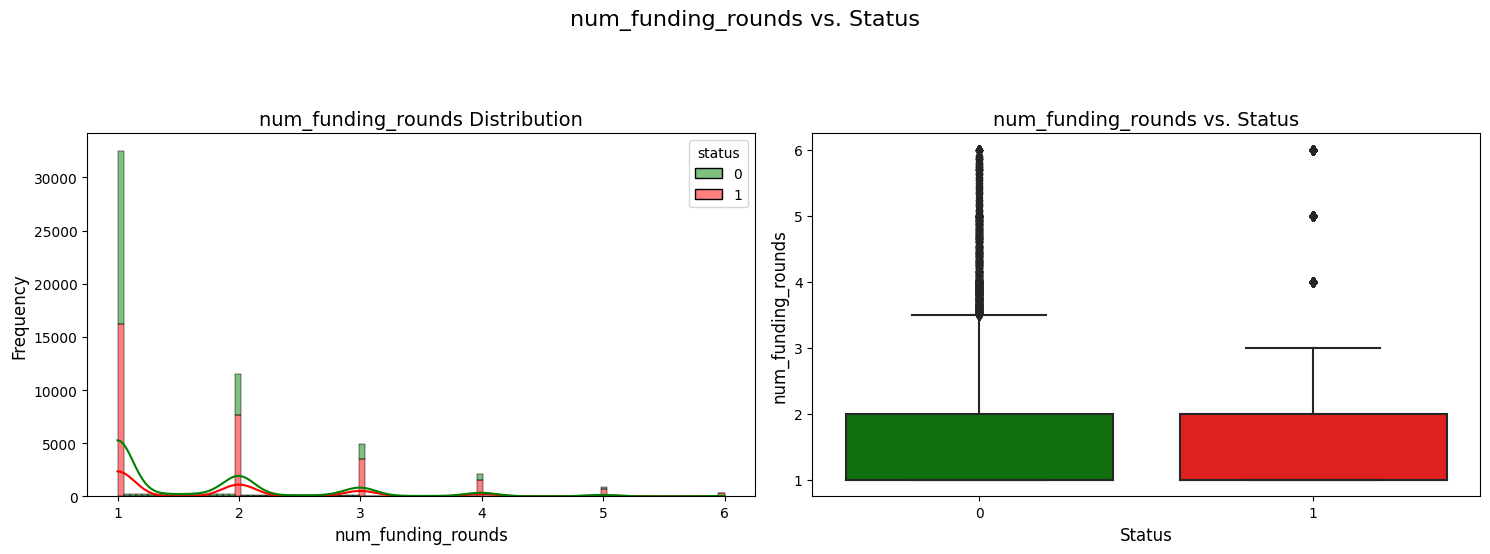

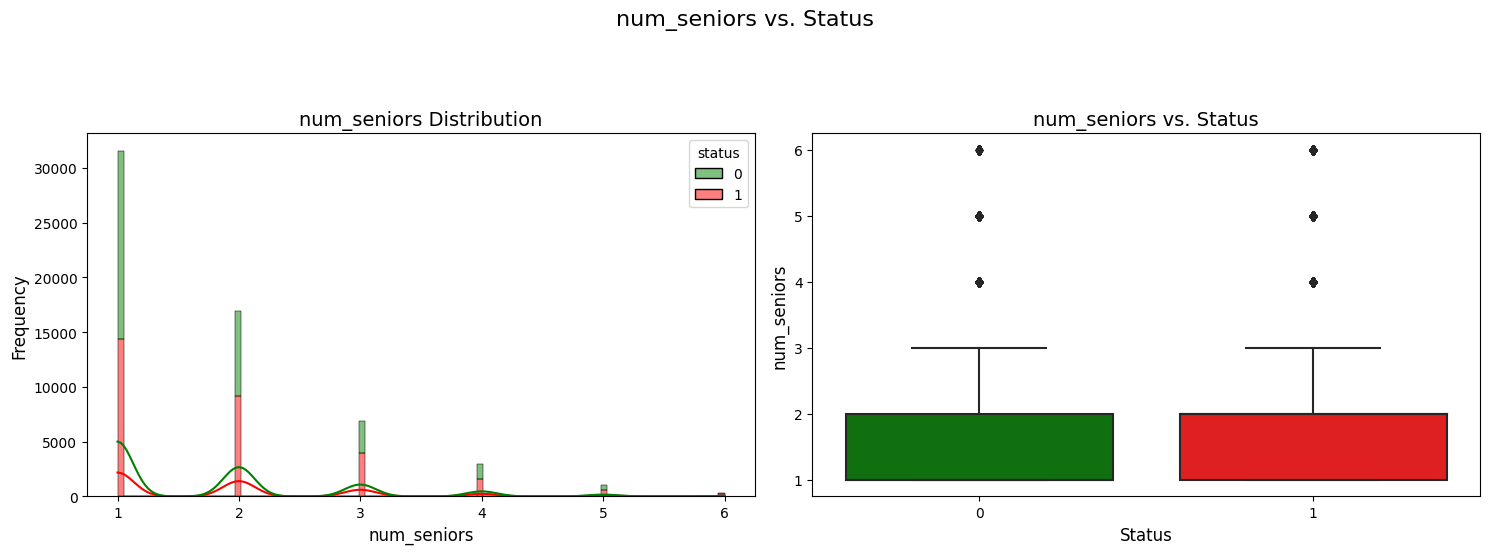

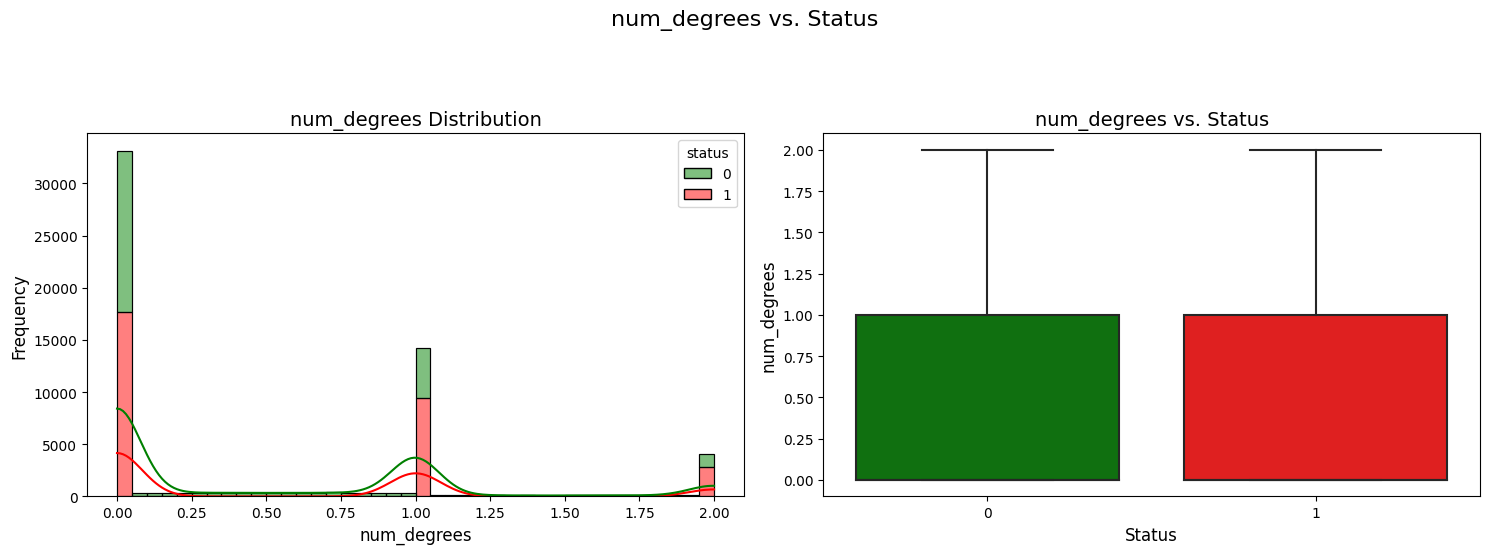

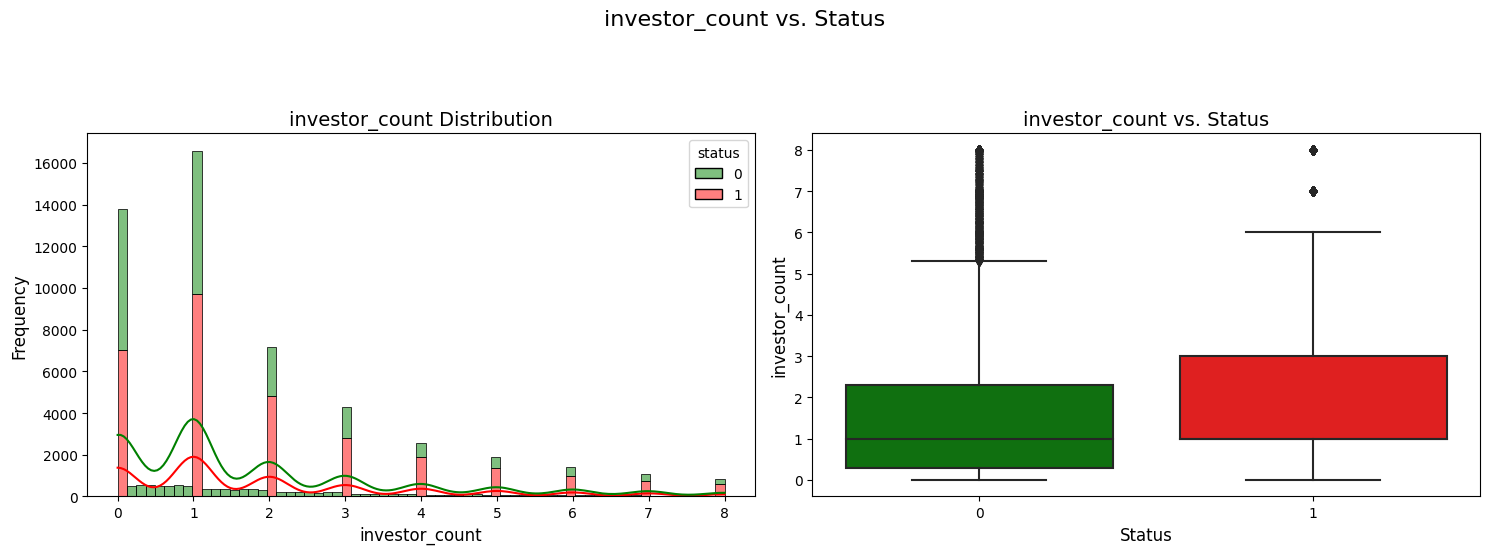

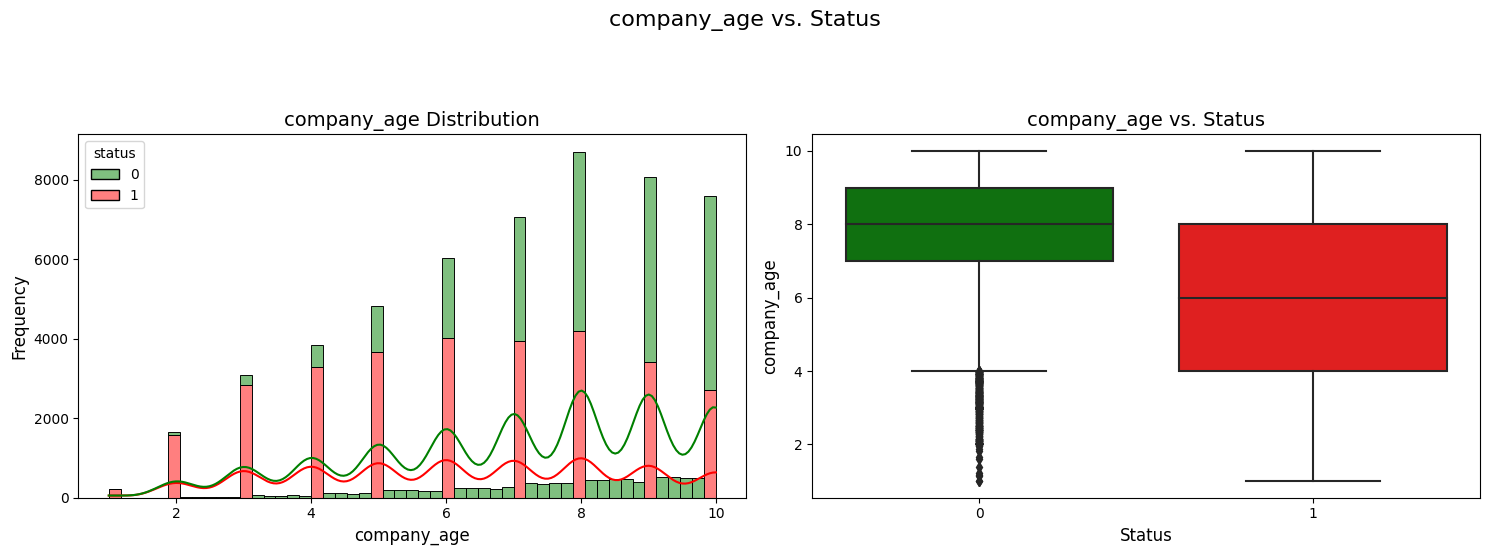

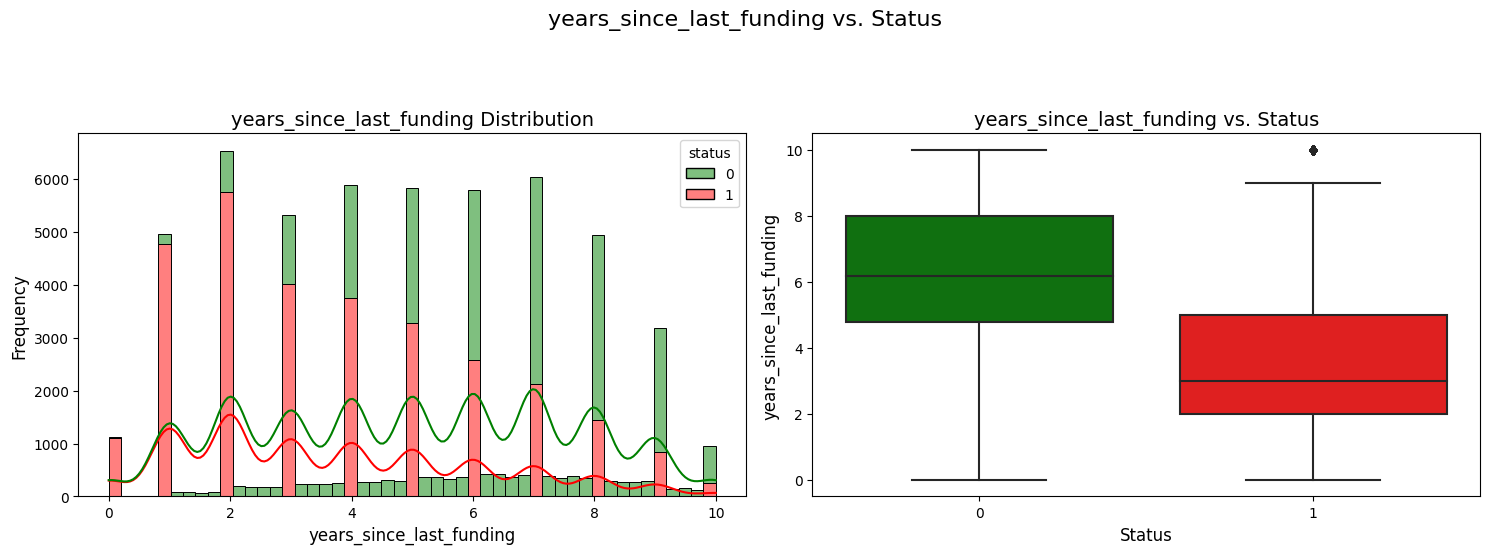

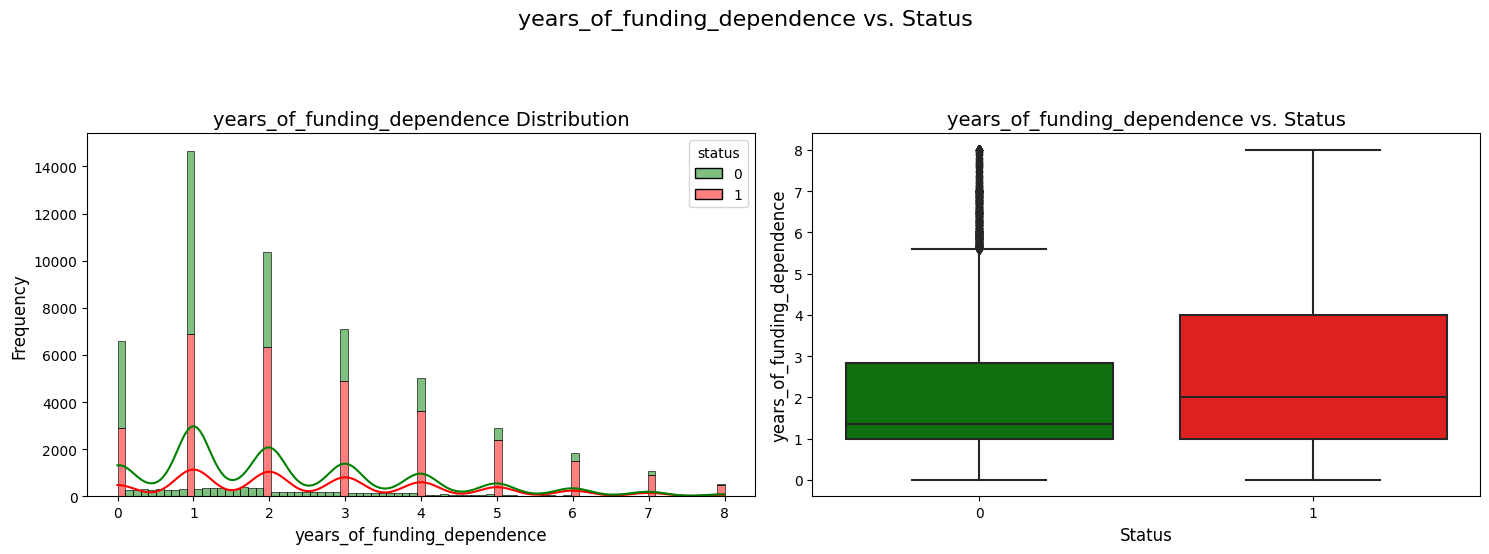

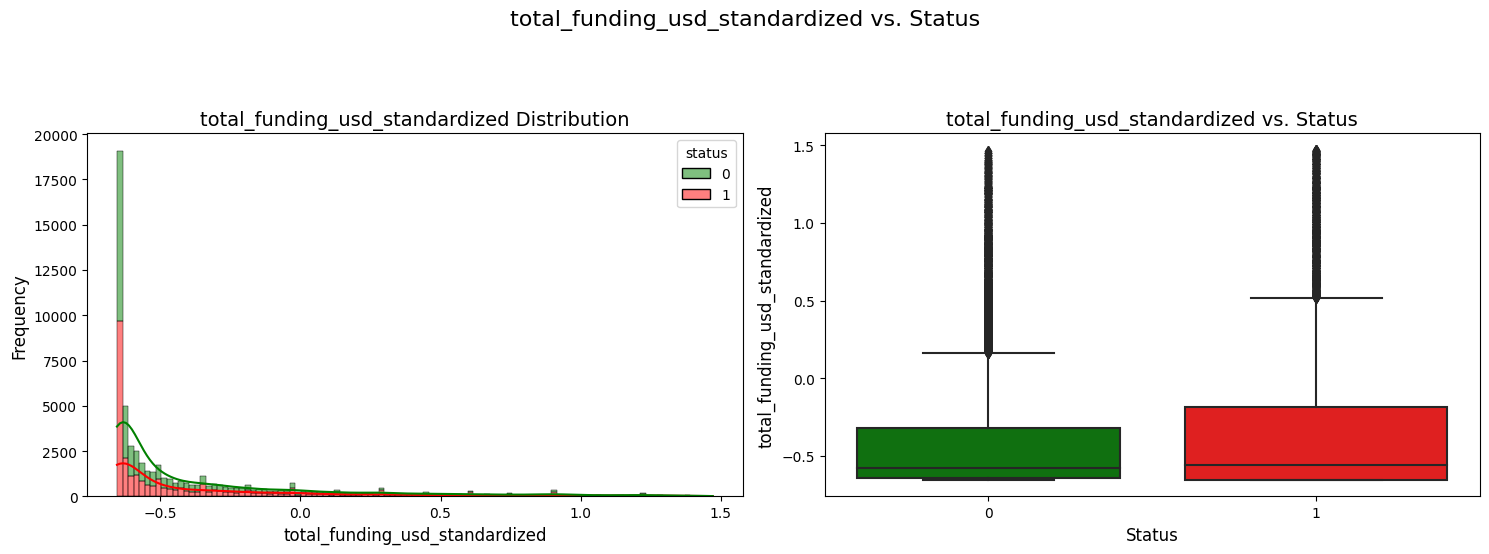

In [ ]:
for col in df_num_upsampled.columns:
    hist_box(col, df_upsampled_train)

## Variable selection through statistical tests

In [ ]:
df.dtypes

status                              int64
category_groups_list                int64
num_funding_rounds                float64
num_seniors                         int64
num_degrees                       float64
seed                                int64
early_investment                    int64
any_investment_funding              int64
debt_or_other                       int64
investor_count                    float64
employee_count_cat                  int64
social_media_presence               int64
continent                           int64
company_age                       float64
years_since_last_funding          float64
years_of_funding_dependence       float64
total_funding_usd_standardized    float64
all_male                            int64
dtype: object

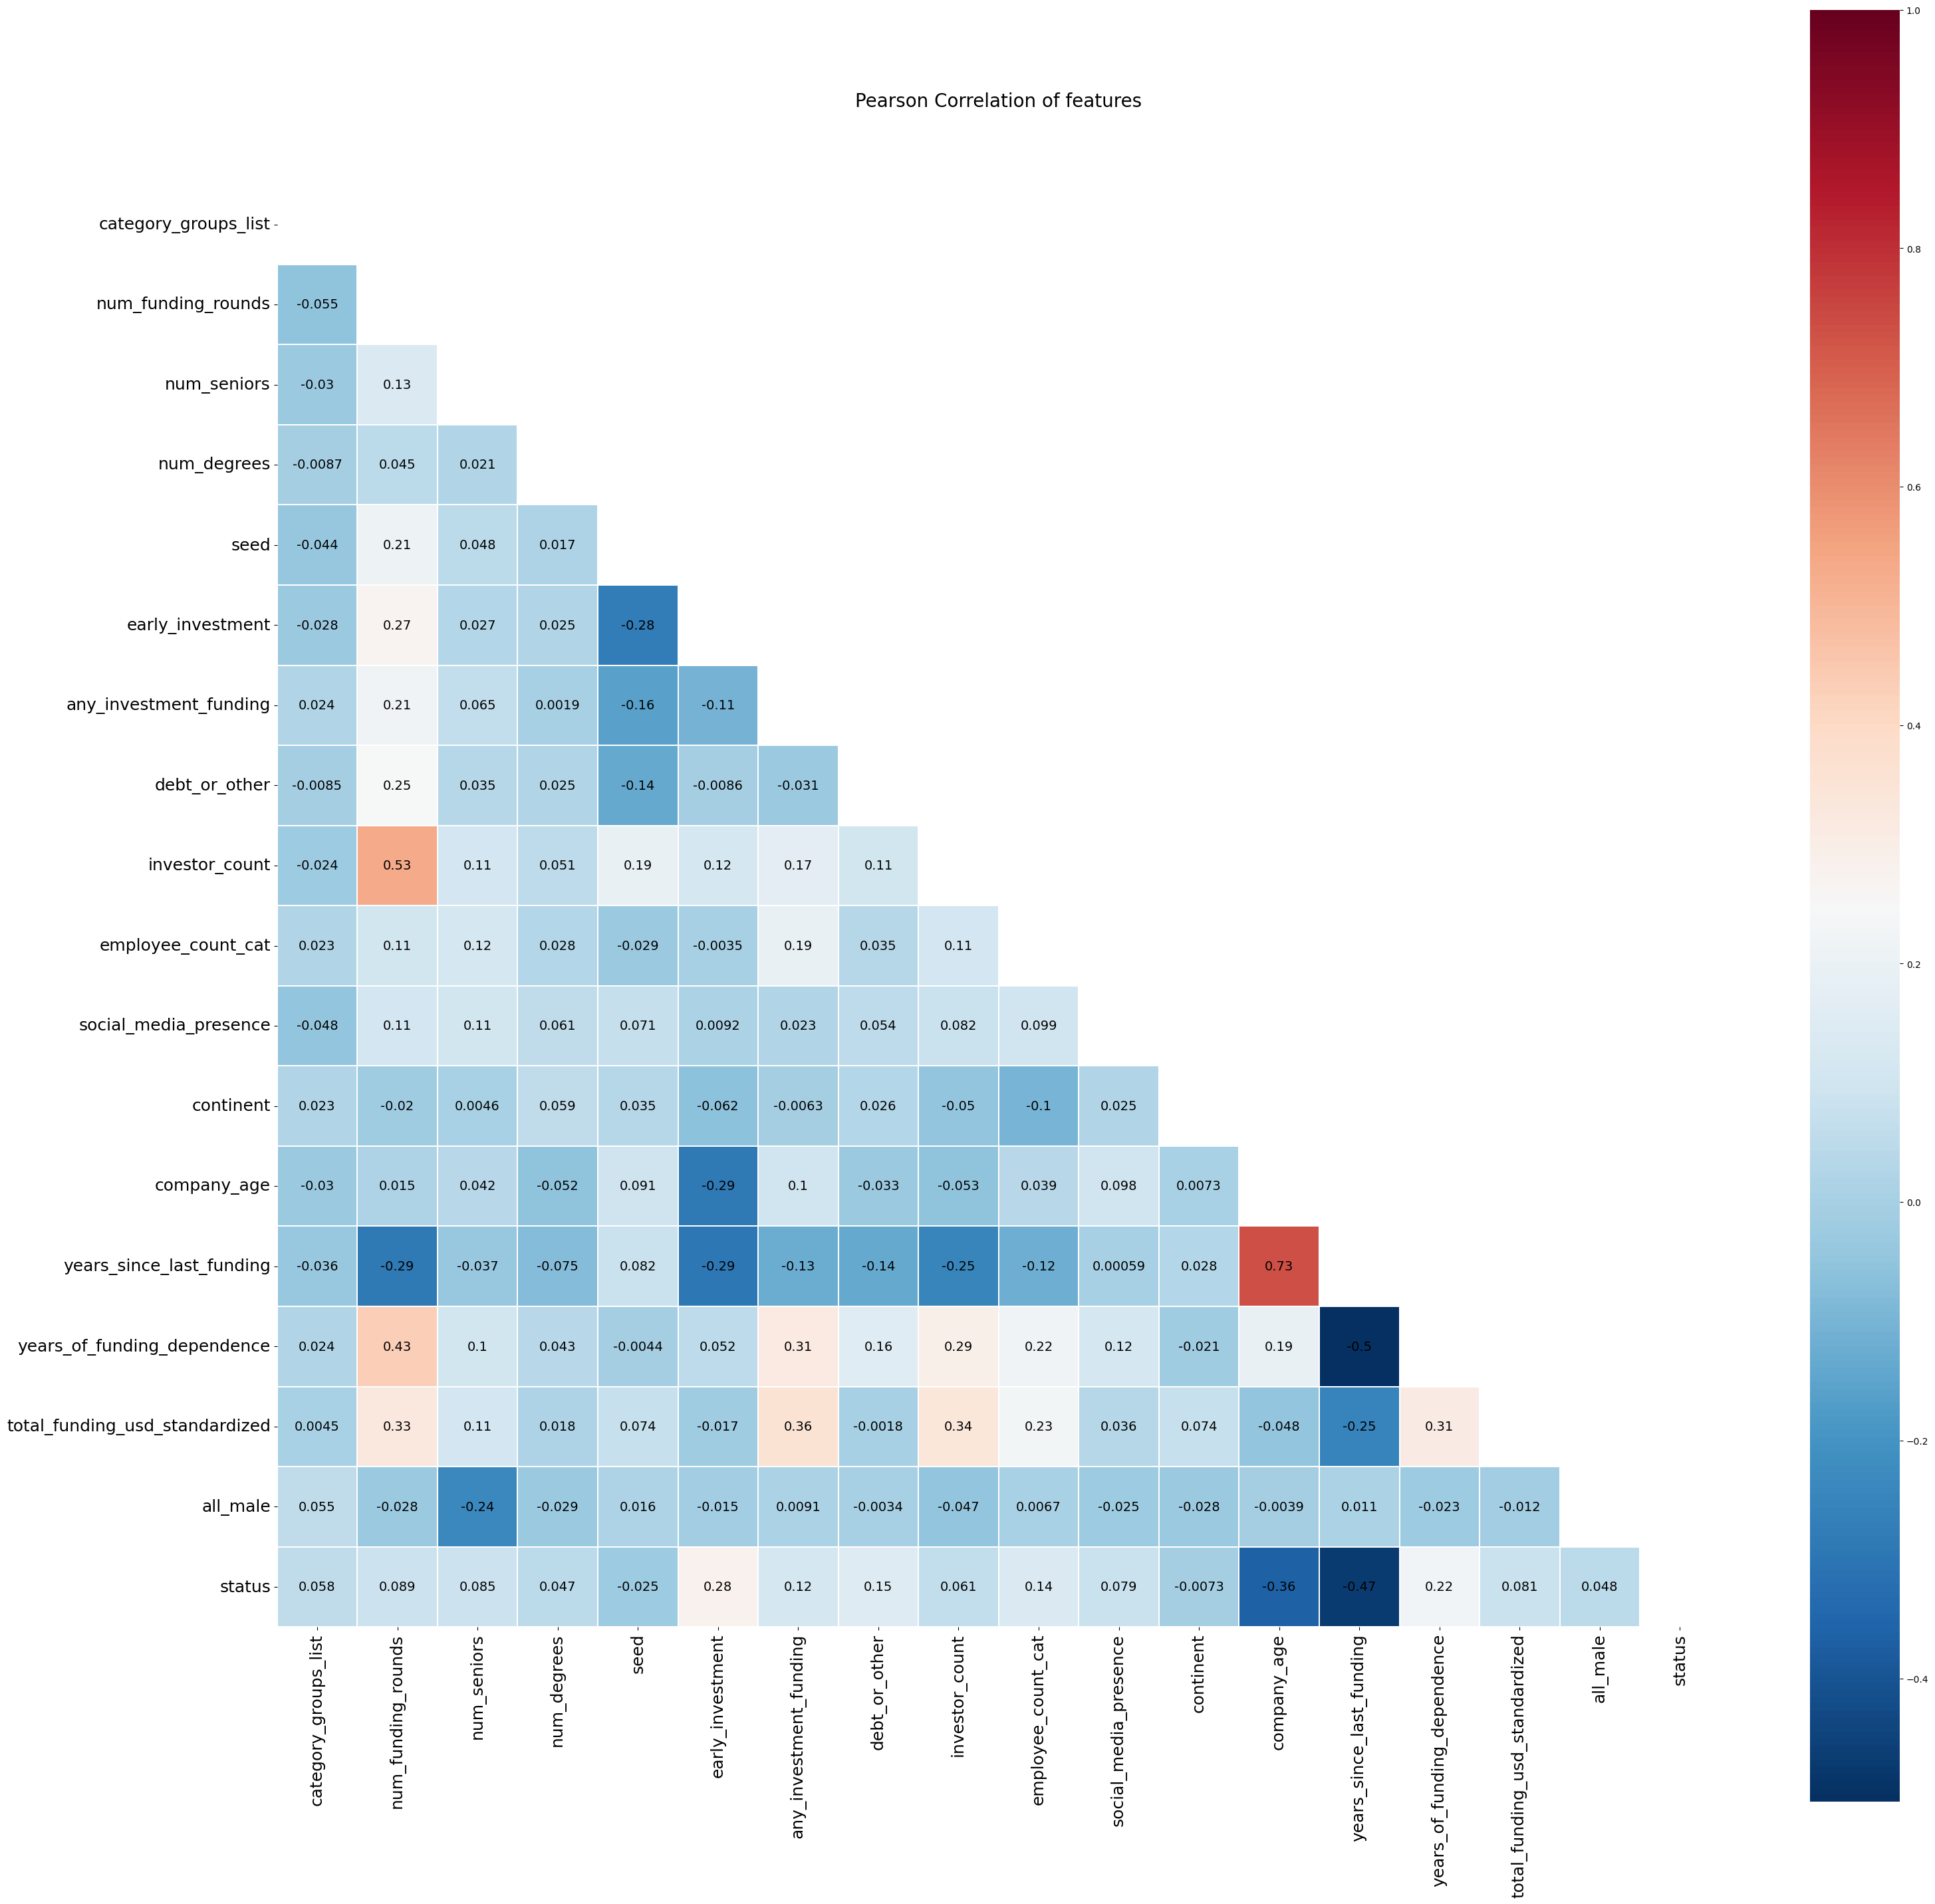

In [ ]:
#creating correlation matrix
colormap = plt.cm.RdBu_r  # Change the colormap for better contrast
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, fontsize = 20)
matrix = np.triu(df.corr())
sns.heatmap(df_upsampled_train.corr(), linewidth = 0.1, vmax = 1.0,
            square =True,
            cmap=colormap, linecolor = 'white', annot=True,
            annot_kws={'fontsize': 14, 'color': 'black'},
            mask = matrix)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

# save plot as PNG
plt.savefig("my_plot.png", dpi=300, bbox_inches='tight')

#Show plot
plt.show()


Reduced logistic regression model

In [ ]:
df_upsampled_train

,category_groups_list,num_funding_rounds,num_seniors,num_degrees,seed,early_investment,any_investment_funding,debt_or_other,investor_count,employee_count_cat,social_media_presence,continent,company_age,years_since_last_funding,years_of_funding_dependence,total_funding_usd_standardized,all_male,status
0,9,1.0,1,1.000000,1,0,0,0,2.000000,1,0,3,9.000000,6.000000,4.000000,-0.481792,1,1
1,7,1.0,1,2.000000,1,0,0,0,2.000000,2,0,2,8.000000,8.000000,1.000000,-0.027546,1,0
2,23,4.0,3,0.000000,1,0,0,0,2.000000,2,1,4,10.000000,6.000000,4.000000,-0.126872,1,1
3,3,2.0,1,0.000000,1,0,1,0,8.000000,4,1,2,4.000000,1.000000,3.000000,-0.654206,1,1
4,0,1.0,1,0.000000,1,0,0,0,4.000000,2,0,4,2.000000,2.000000,1.000000,0.035120,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59801,12,1.0,4,2.000000,0,0,1,0,1.000000,2,0,3,10.000000,6.091337,3.954332,-0.654206,1,0
59802,17,1.0,1,0.851563,1,0,0,0,0.000000,2,0,3,7.851563,6.000000,2.000000,-0.081694,1,0
59803,31,1.0,1,0.000000,1,0,0,0,1.000000,1,1,3,9.681019,9.681019,0.000000,-0.643537,1,0
59804,9,1.0,2,0.000000,0,0,1,0,1.094420,1,0,4,8.094420,6.188840,2.000000,0.232664,1,0


In [ ]:
import statsmodels.api as sm

# Specify the formula for logistic regression
formula = 'status ~ years_since_last_funding * company_age'

# Fit the model using training data
model = sm.formula.glm(formula=formula, family=sm.families.Binomial(),
                       data=df_upsampled_train).fit()

# Print model summary
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                59806
Model:                            GLM   Df Residuals:                    59802
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33773.
Date:                Wed, 31 May 2023   Deviance:                       67546.
Time:                        00:18:26   Pearson chi2:                 5.90e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2265
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


## Modelling upsampled vs Original Datasets

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import RFE

#Original
# Fit logistic regression on original dataset
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
original_lr_accuracy = accuracy_score(y_test, y_pred)
original_lr_cm = confusion_matrix(y_test, y_pred)

# Fit random forest on original dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
original_rf_accuracy = accuracy_score(y_test, y_pred)
original_rf_cm = confusion_matrix(y_test, y_pred)

#Fit logistic regression model on original dataset with AIC step selection
lr_aic = LogisticRegression(solver='liblinear', random_state=42)
my_selector = RFE(lr_aic, step=1)
my_selector.fit(X_train, y_train)
y_pred_aic = my_selector.predict(X_test)
original_lr_aic_accuracy = accuracy_score(y_test, y_pred_aic)
original_lr_aic_cm = confusion_matrix(y_test, y_pred_aic)


#Fit Lasso on original dataset
lasso = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
original_lasso_accuracy = accuracy_score(y_test, y_pred_lasso)
original_lasso_cm = confusion_matrix(y_test, y_pred_lasso)



#Upsampled
# Fit logistic regression on upsampled dataset
lr_up = LogisticRegression(random_state=42)
lr_up.fit(X_upsampled_train, y_upsampled_train)
y_pred_up = lr_up.predict(X_test)
upsampled_lr_accuracy = accuracy_score(y_test, y_pred_up)
upsampled_lr_cm = confusion_matrix(y_test, y_pred_up)

# Fit random forest on upsampled dataset
rf_up = RandomForestClassifier(random_state=42)
rf_up.fit(X_upsampled_train, y_upsampled_train)
y_pred_up = rf_up.predict(X_test)
upsampled_rf_accuracy = accuracy_score(y_test, y_pred_up)
upsampled_rf_cm = confusion_matrix(y_test, y_pred_up)

#Fit logistic regression model on upsampled dataset with AIC step selection
lr_aic_up = LogisticRegression(solver='liblinear', random_state=42)
selector_up = RFE(lr_aic_up, step=1)
selector_up.fit(X_upsampled_train, y_upsampled_train)
y_pred_aic_up = selector_up.predict(X_test)
original_lr_aic_accuracy_up = accuracy_score(y_test, y_pred_aic_up)
original_lr_aic_cm_up = confusion_matrix(y_test, y_pred_aic_up)


#Fit Lasso on upsampled dataset
lasso_up = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
lasso_up.fit(X_upsampled_train, y_upsampled_train)
y_pred_lasso_up = lasso_up.predict(X_test)
original_lasso_accuracy_up = accuracy_score(y_test, y_pred_lasso_up)
original_lasso_cm_up = confusion_matrix(y_test, y_pred_lasso_up)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
X_test

,category_groups_list,num_funding_rounds,num_seniors,num_degrees,seed,early_investment,any_investment_funding,debt_or_other,investor_count,employee_count_cat,social_media_presence,continent,company_age,years_since_last_funding,years_of_funding_dependence,total_funding_usd_standardized,all_male
6298,26,1.0,3,0.0,0,1,0,0,2.0,1,1,4,3.0,3.0,1.0,-0.627573,0
20932,14,2.0,1,1.0,1,1,0,0,3.0,1,0,4,4.0,2.0,2.0,-0.616607,0
30291,17,1.0,1,0.0,0,1,0,0,0.0,1,1,2,3.0,3.0,0.0,-0.622873,1
47955,21,2.0,3,2.0,0,1,1,0,2.0,1,0,3,4.0,2.0,2.0,-0.651107,0
58074,26,1.0,1,0.0,0,0,1,0,1.0,3,0,2,10.0,5.0,5.0,-0.163224,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48400,3,4.0,4,1.0,0,1,0,0,0.0,1,0,1,4.0,3.0,1.0,-0.634701,0
57794,4,1.0,2,0.0,1,0,0,0,0.0,2,0,2,8.0,6.0,2.0,-0.597150,1
48153,15,3.0,1,0.0,1,1,0,1,3.0,1,0,3,2.0,2.0,1.0,0.703459,1
541,26,1.0,3,0.0,0,0,1,0,1.0,1,1,3,7.0,4.0,3.0,-0.654206,1


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression (Original)', 'Random Forest (Original)',
              'AIC step (Original)', 'Lasso (Original)',
              'Logistic Regression (Upsampled)', 'Random Forest (Upsampled)',
              'AIC step (Upsampled)', 'Lasso (Upsampled)'],
    'Accuracy': [original_lr_accuracy, original_rf_accuracy,
                 original_lr_aic_accuracy, original_lasso_accuracy,
                 upsampled_lr_accuracy, upsampled_rf_accuracy,
                 original_lr_aic_accuracy_up, original_lasso_accuracy_up],
    'TN': [original_lr_cm[0, 0], original_rf_cm[0, 0],
           original_lr_aic_cm[0,0], original_lasso_cm[0,0],
           upsampled_lr_cm[0, 0], upsampled_rf_cm[0, 0],
           original_lr_aic_cm_up[0,0], original_lasso_cm_up[0,0]],
    'FP': [original_lr_cm[0, 1], original_rf_cm[0, 1],
           original_lr_aic_cm[0,1], original_lasso_cm[0,1],
           upsampled_lr_cm[0, 1], upsampled_rf_cm[0, 1],
           original_lr_aic_cm_up[0,1], original_lasso_cm_up[0,1]],
    'FN': [original_lr_cm[1, 0], original_rf_cm[1, 0],
           original_lr_aic_cm[1,0], original_lasso_cm[1,0],
           upsampled_lr_cm[1, 0], upsampled_rf_cm[1, 0],
           original_lr_aic_cm_up[1,0], original_lasso_cm_up[1,0]],
    'TP': [original_lr_cm[1, 1], original_rf_cm[1, 1],
           original_lr_aic_cm[1,1], original_lasso_cm[1,1],
           upsampled_lr_cm[1, 1], upsampled_rf_cm[1, 1],
           original_lr_aic_cm_up[1,1], original_lasso_cm_up[1,1]]
})

print(results)


                             Model  Accuracy   TN    FP    FN    TP
0   Logistic Regression (Original)  0.868950   49  1084    45  7437
1         Random Forest (Original)  0.863958   93  1040   132  7350
2              AIC step (Original)  0.867208   33  1100    44  7438
3                 Lasso (Original)  0.868833   46  1087    43  7439
4  Logistic Regression (Upsampled)  0.726640  612   521  1834  5648
5        Random Forest (Upsampled)  0.845386  222   911   421  7061
6             AIC step (Upsampled)  0.726872  613   520  1833  5649
7                Lasso (Upsampled)  0.726524  609   524  1832  5650


In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(lasso_up, prefit=True)
selected_features_lasso = X_train.columns[selector.get_support()].values



selected_features_aic = X_train.columns[selector_up.support_].values
print("features for Lasso: ", selected_features_lasso)
print('\n')
print("features for AIC: ", selected_features_aic)

features for Lasso:  ['category_groups_list' 'num_funding_rounds' 'num_seniors' 'num_degrees'
 'seed' 'early_investment' 'any_investment_funding' 'debt_or_other'
 'investor_count' 'employee_count_cat' 'social_media_presence' 'continent'
 'company_age' 'years_since_last_funding' 'years_of_funding_dependence'
 'total_funding_usd_standardized' 'all_male']


features for AIC:  ['num_funding_rounds' 'seed' 'early_investment' 'any_investment_funding'
 'debt_or_other' 'employee_count_cat' 'social_media_presence'
 'years_since_last_funding']


As we can see, logistic regression with original data doesn't detect at all true negative. What it does is simply predict everything as positive (so operating) and thus we don't really get any better results

In [ ]:
# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X_train.columns

# Print the top 10 most important features
for i in range(5):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

1. total_funding_usd_standardized: 0.15927904844791863
2. category_groups_list: 0.1443496426014566
3. years_since_last_funding: 0.11061438272992757
4. company_age: 0.07740594166768473
5. investor_count: 0.0729733012033647


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Vanilla application
print("Vanilla models comparison Original")


#Original dataset
# Fit each model to the training set and evaluate its performance on test set
models = [('LR', LogisticRegression(solver='liblinear')),
          ('KSVM', SVC(kernel='rbf')),
          ('KNN', KNeighborsClassifier()), ('CT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=100, random_state=42))]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision',
                                            'Recall', 'F1 Score'])
results_df = results_df.sort_values(['Precision', 'Recall'], ascending=False)
print(results_df)



Vanilla models comparison Original
  Model  Accuracy  Precision    Recall  F1 Score
3    CT  0.797330   0.890842  0.873697  0.882186
2   KNN  0.853395   0.879439  0.963245  0.919436
4    RF  0.863958   0.876043  0.982358  0.926159
0    LR  0.869066   0.872625  0.994387  0.929535
1  KSVM  0.868485   0.868485  1.000000  0.929614


Models results on upsampled dataset

In [ ]:
# Vanilla application
print("Vanilla models comparison Upsampled")


#Upsampled
# Fit each model to the training set and evaluate its performance on test set
models = [('LR', LogisticRegression(solver='liblinear')),
          ('KSVM', SVC(kernel='rbf')),
          ('KNN', KNeighborsClassifier()), ('CT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=100, random_state=42))]

results = []
for name, model in models:
    model.fit(X_upsampled_train, y_upsampled_train)
    y_pred_up = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_up)
    prec = precision_score(y_test, y_pred_up)
    rec = recall_score(y_test, y_pred_up)
    f1 = f1_score(y_test, y_pred_up)
    results.append([name, acc, prec, rec, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision',
                                            'Recall', 'F1 Score'])
results_df = results_df.sort_values(['Precision', 'Recall'], ascending=False)
print(results_df)


Vanilla models comparison Upsampled
  Model  Accuracy  Precision    Recall  F1 Score
1  KSVM  0.711434   0.921959  0.729484  0.814505
0    LR  0.726524   0.915128  0.755146  0.827475
2   KNN  0.685781   0.913993  0.704491  0.795683
3    CT  0.777945   0.887543  0.852312  0.869571
4    RF  0.845386   0.885725  0.943732  0.913809


##Optimized model

Let us first estimate the number of trees that would be optimal for our model to get highest accuracy

In [ ]:
# score_array = []
# for each in range(1, 100):
#     rf_loop = RandomForestClassifier(
#         n_estimators=each, random_state=1)
#     rf_loop.fit(X_upsampled_train, y_upsampled_train)
#     score_array.append(rf_loop.score(X_test, y_test))

# fig = plt.figure(figsize=(15, 7))
# plt.plot(range(1, 100), score_array, color='#ec838a')
# plt.ylabel('Accuracy\n', horizontalalignment="center",
#            fontstyle="normal", fontsize="large",
#            fontfamily="sans-serif")
# plt.xlabel('Number of trees\n', horizontalalignment="center",
#            fontstyle="normal", fontsize="large",
#            fontfamily="sans-serif")
# plt.title('Optimal Number of Trees for Random Forest Model \n',
#           horizontalalignment="center", fontstyle="normal",
#           fontsize="22", fontfamily="sans-serif")
# # plt.legend(loc='top right', fontsize = "medium")
# plt.xticks(rotation=0, horizontalalignment="center")
# plt.yticks(rotation=0, horizontalalignment="right")
# plt.show()

In [ ]:
# improve random forest
print('Parameters currently in use:\n')
pprint(rf_up.get_params())
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall',
                                'F1 Score'])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=600, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 40, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Perform RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=20, cv=2,
                               verbose=4, random_state=42,
                               n_jobs=-1)

# Fit the random search model
rf_random.fit(X_upsampled_train, y_upsampled_train)

# Print the best hyperparameters found by RandomizedSearchCV
print(rf_random.best_params_)

# Create a new random forest model with the best hyperparameters
better_rf = RandomForestClassifier(**rf_random.best_params_)

# Train the model on the upsampled training data
better_rf.fit(X_upsampled_train, y_upsampled_train)

# Use the trained model to make predictions on the test data
y_pred = better_rf.predict(X_test)

# Calculate evaluation metrics for the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Append the evaluation metrics to the results dataframe
model_results = pd.DataFrame([['RF Random Search',
                               acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision',
                                      'Recall', 'F1 Score'])

results = results.append(model_results)


# Sort the results dataframe by accuracy and precision in descending order
results = results.sort_values(["Accuracy", "Precision"],
                              ascending=[False, False])

print(results)


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True, False],
 'max_depth': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600]}
Fitting 2 folds for each of 20 candidates, totalling 40 fits
{'n_estimators': 555, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': False}
              Model  Accuracy  Precision    Recall  F1 Score
0  RF Random Search  0.849681   0.882622  0.953756  0

<ipython-input-68-145f9bf42c72>:67: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [False],
    'max_depth': [22, 28],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split':  [2.0, 5],
    'n_estimators': [555, 600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
# n_jobs = -1 uses 100% of the cpu of one of the cores: makes the process faster
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 2, n_jobs = -1, verbose = 2)


grid_search.fit(X_upsampled_train, y_upsampled_train)
pprint(grid_search.best_params_)
best_grid = grid_search.best_estimator_
pprint(best_grid)
# Predicting the Test set results
y_pred = best_grid.predict(X_test)
# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['RF Grid Search',
                               acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision',
                                      'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision",
                               "Recall"], ascending=False)
print(results)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


16 fits failed out of a total of 32.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line

{'bootstrap': False,
 'max_depth': 28,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}
RandomForestClassifier(bootstrap=False, max_depth=28, min_samples_split=5,
                       n_estimators=600)
              Model  Accuracy  Precision    Recall  F1 Score
1    RF Grid Search  0.850842   0.882956  0.954825  0.917485
0  RF Random Search  0.849681   0.882622  0.953756  0.916811


<ipython-input-69-0f251ff4b5bf>:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall',
                                'F1 Score'])


# Predicting the Test set results
y_pred = best_grid.predict(X_test)
# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['RF Grid Search',
                               acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision',
                                      'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index=True)
results = results.sort_values(["Precision",
                               "Recall"], ascending=False)
print(results)

            Model  Accuracy  Precision    Recall  F1 Score
0  RF Grid Search  0.850842   0.882956  0.954825  0.917485


<ipython-input-70-5170fd604530>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to disk
filename = 'model.sav'
joblib.dump(grid_search, filename)

# Copy the saved model to Google Drive
!mkdir -p '/content/drive/My Drive/path/to'
!cp './model.sav' '/content/drive/My Drive/path/to/model.sav'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
results_df = results_df.loc[results_df.Model == "RF"]

results = results.append(results_df, ignore_index=True)
results

<ipython-input-72-804a9a97f139>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,Accuracy,Precision,Recall,F1 Score
0,RF Grid Search,0.850842,0.882956,0.954825,0.917485
1,RF,0.845386,0.885725,0.943732,0.913809


##Final predictions on test set

In [ ]:
# Use the trained model to make predictions on the test data
y_pred_final = better_rf.predict(X_test_tot)

# Calculate evaluation metrics for the model
acc = accuracy_score(y_test_tot, y_pred_final)
prec = precision_score(y_test_tot, y_pred_final)
rec = recall_score(y_test_tot, y_pred_final)
f1 = f1_score(y_test_tot, y_pred_final)

model_results = pd.DataFrame([['RF final test',
                               acc, prec, rec, f1]],
                             columns=['Model', 'Accuracy', 'Precision',
                                      'Recall', 'F1 Score'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,RF final test,0.850428,0.884152,0.952621,0.91711
